# Binary classification

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("diabetes.csv")

#### Show Top 5 Records

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies - Number of times pregnant
- Glucose -Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure - Diastolic blood pressure (mm Hg)
- SkinThickness - Triceps skin fold thickness (mm)
- Insulin - 2-Hour serum insulin (mu U/ml)
- BMI - Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction - Diabetes pedigree function
- Age - Age (years)
- Outcome-Class variable (0 or 1) 268 of 768 are 1, the others are 0

#### Shape of the dataset

In [4]:
df.shape

(768, 9)

#### Summary of the dataset

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**report**
- in pregnancies,insulin, there  is large difference between 75% and max  ( may be outliers are present)
-  simillary in gulcose there is  large difference between min and 25% 

- Glucose	BloodPressure	SkinThickness	Insulin have min value =  0  which is not possible


#### Check Datatypes in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# no object data tuype

In [8]:
# no null values

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

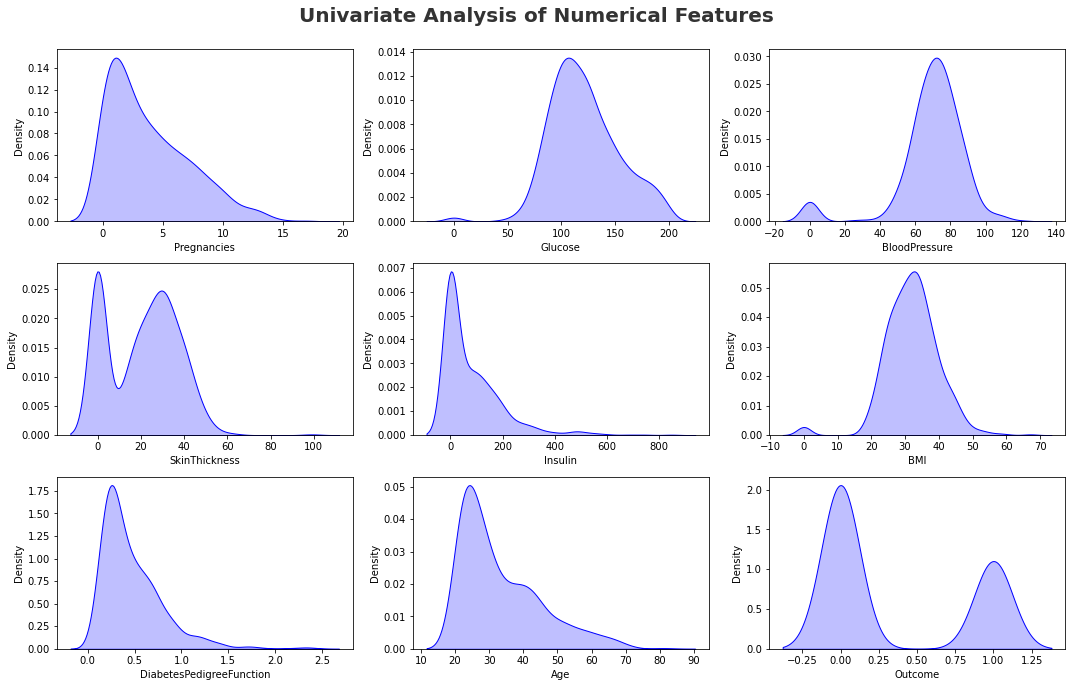

In [10]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='b')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

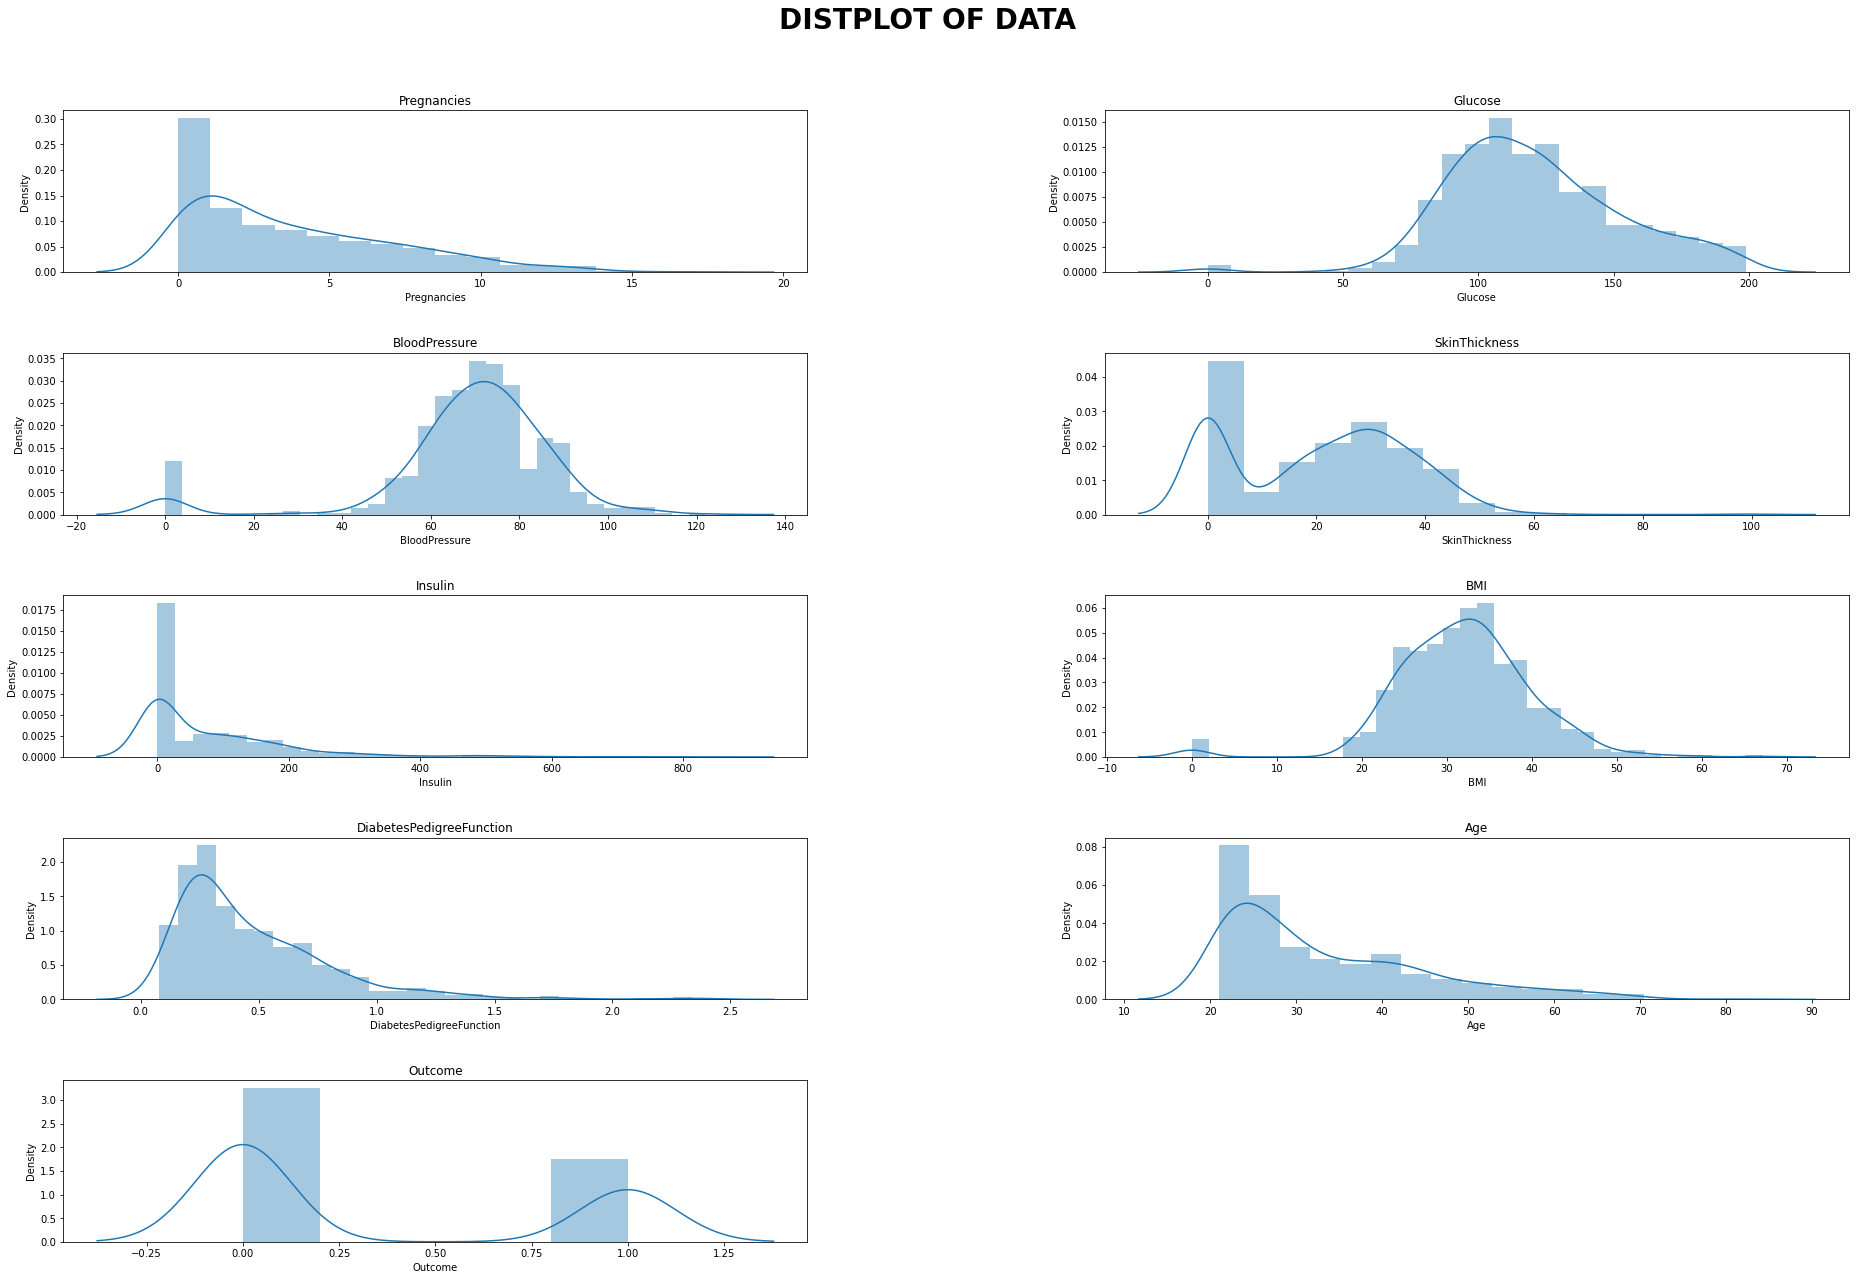

In [11]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(df.columns):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.distplot(df[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

***report***
- there are  two outcomes 1 and 0 (target)
- most of  the features are little bit skewed ( may be present  outliers )
- Glucose BloodPressure SkinThickness Insulin have min value = 0 which is not possible

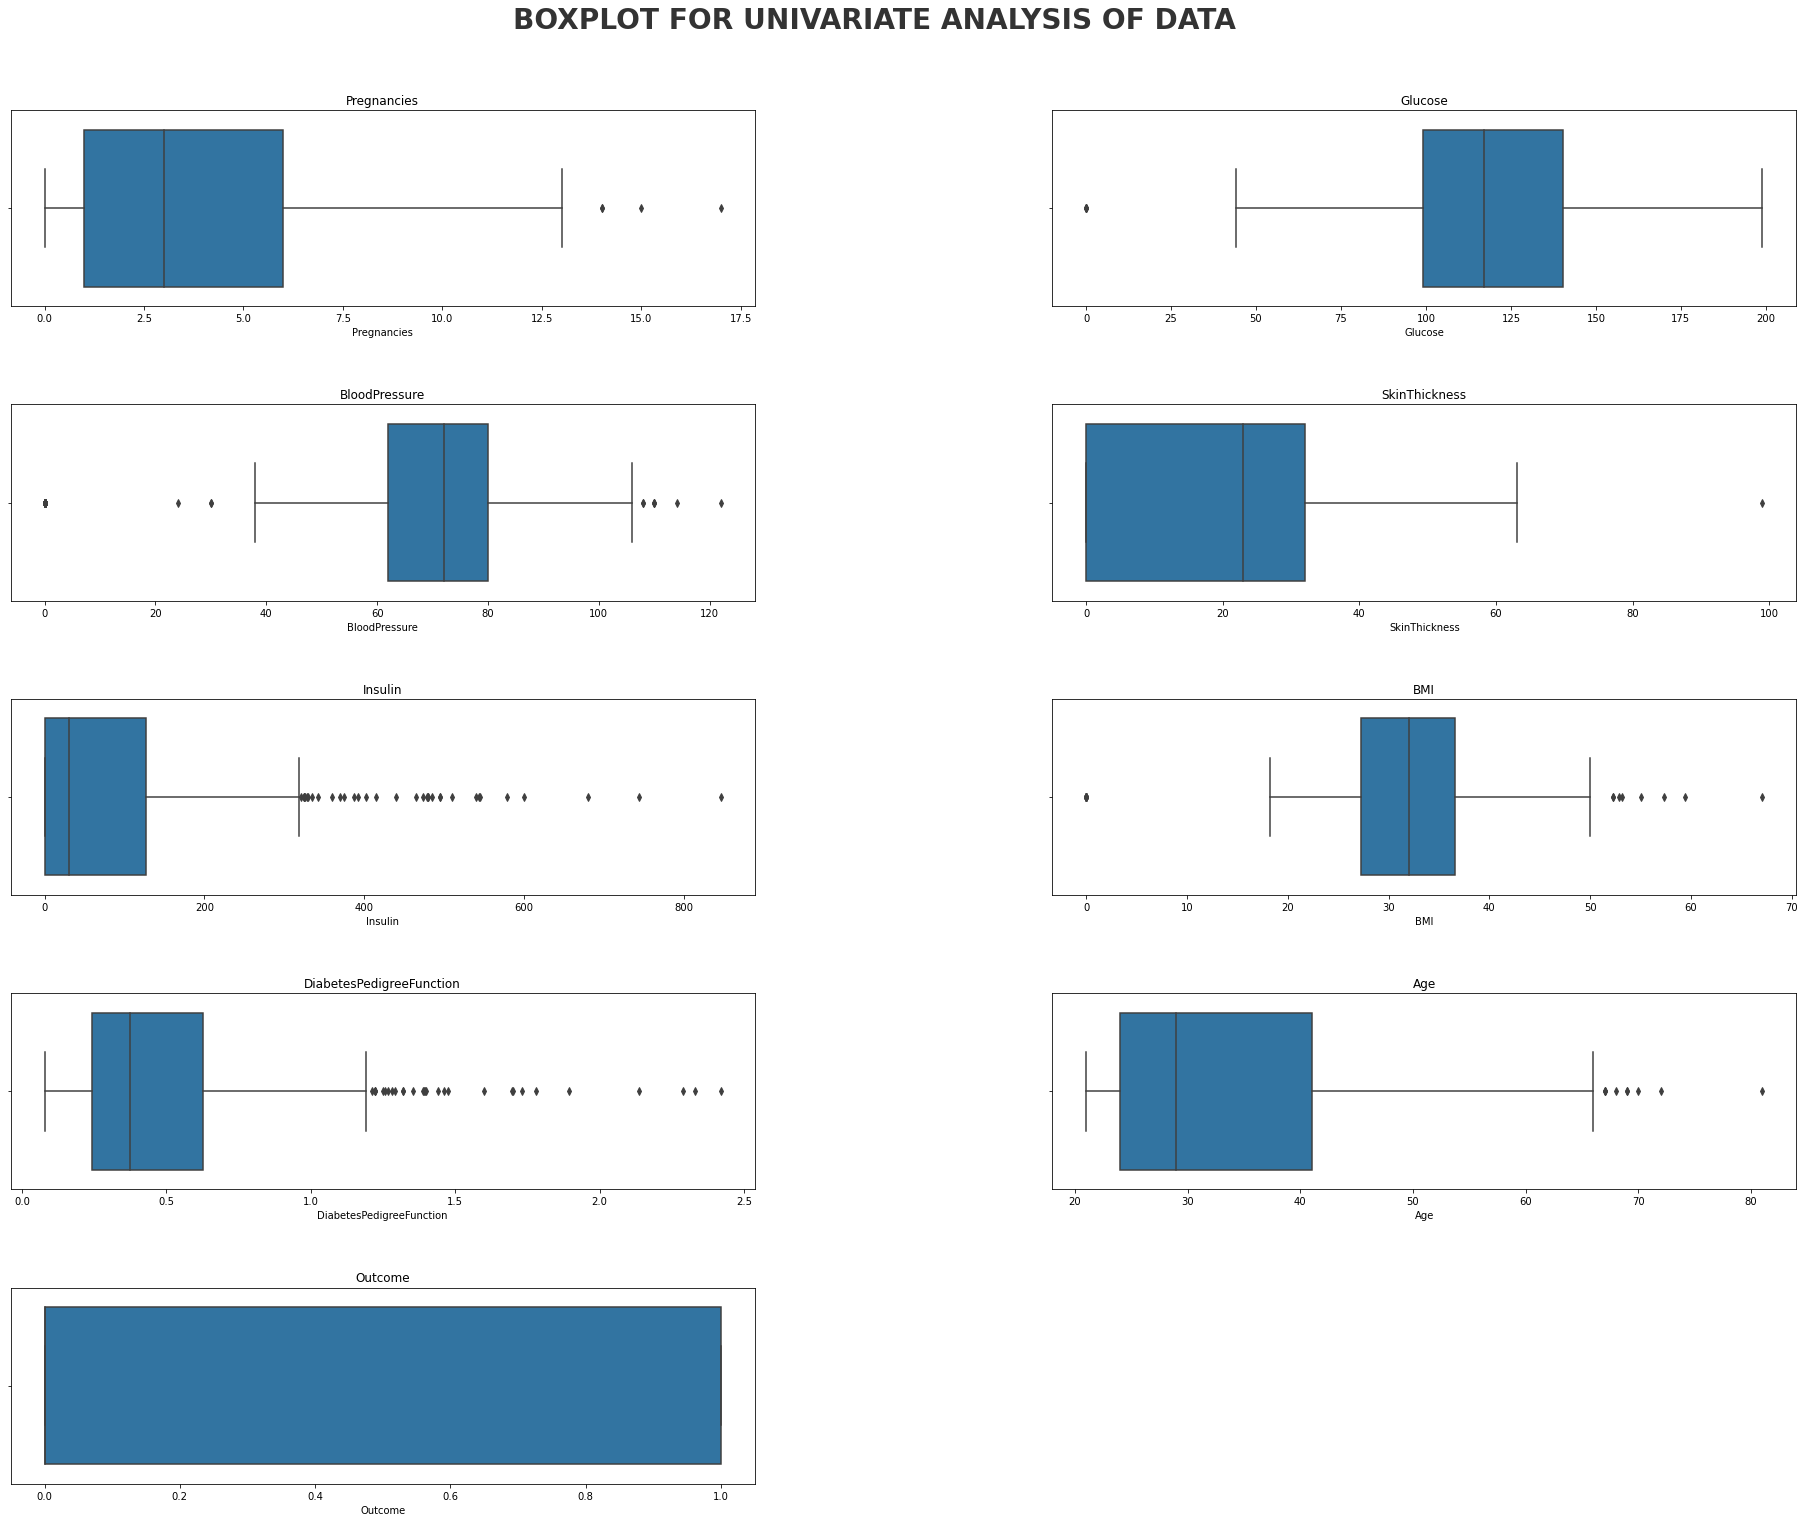

In [12]:
features = df.columns
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data = df, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

- handeling the 0 value in  Glucose, BloodPressure, SkinThickness, Insulin  
- It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [13]:
data = df.copy()
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

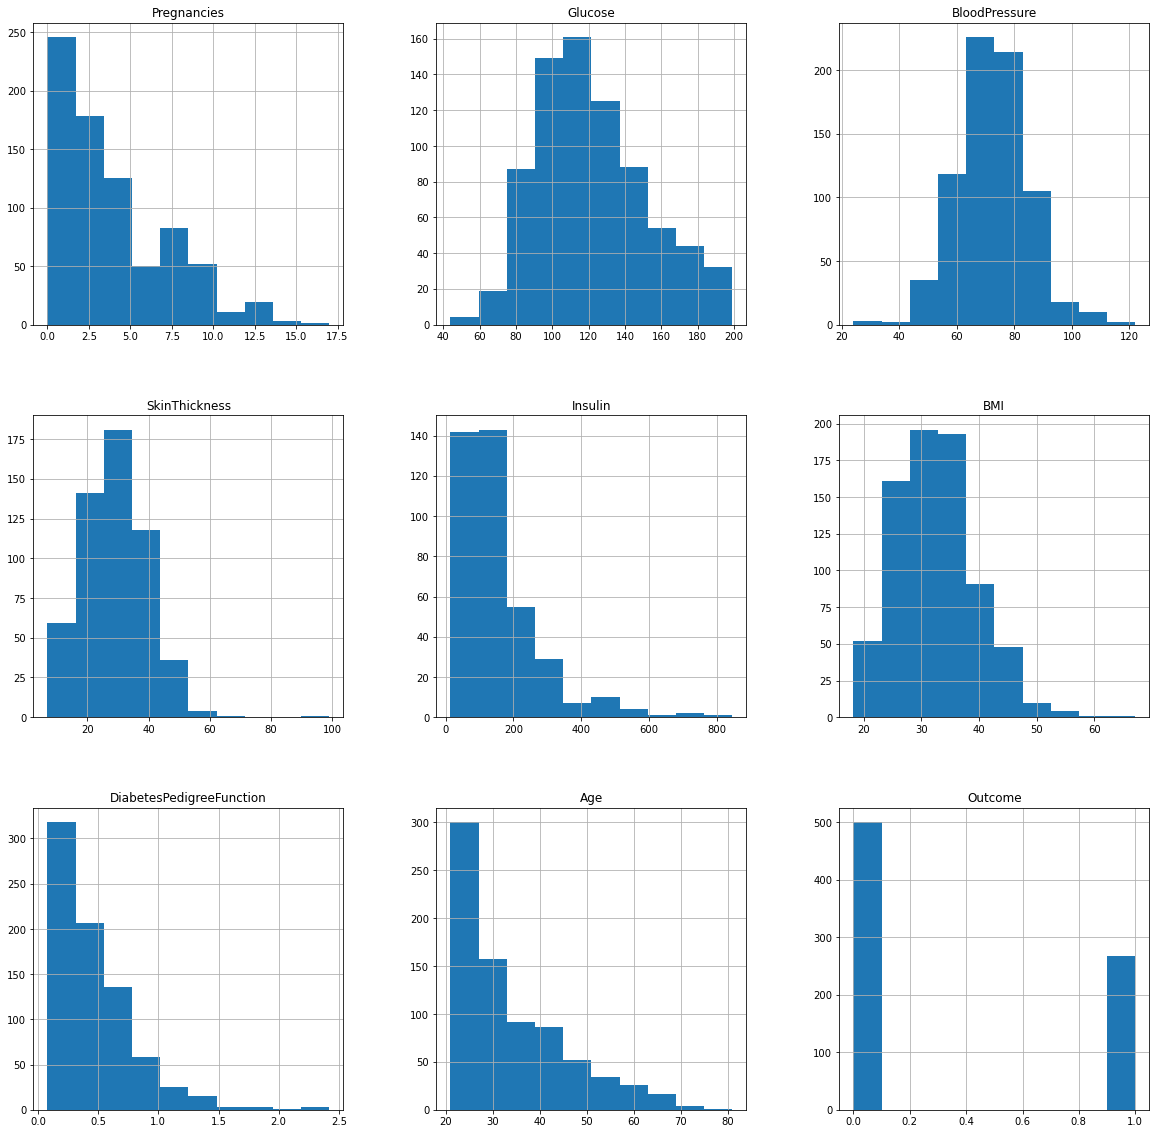

In [14]:
data.hist(figsize = (20,20))

In [15]:
# now we need to impute these values at later satge

## handling outliers

In [16]:
data_c=data.copy()

In [17]:
data_c.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

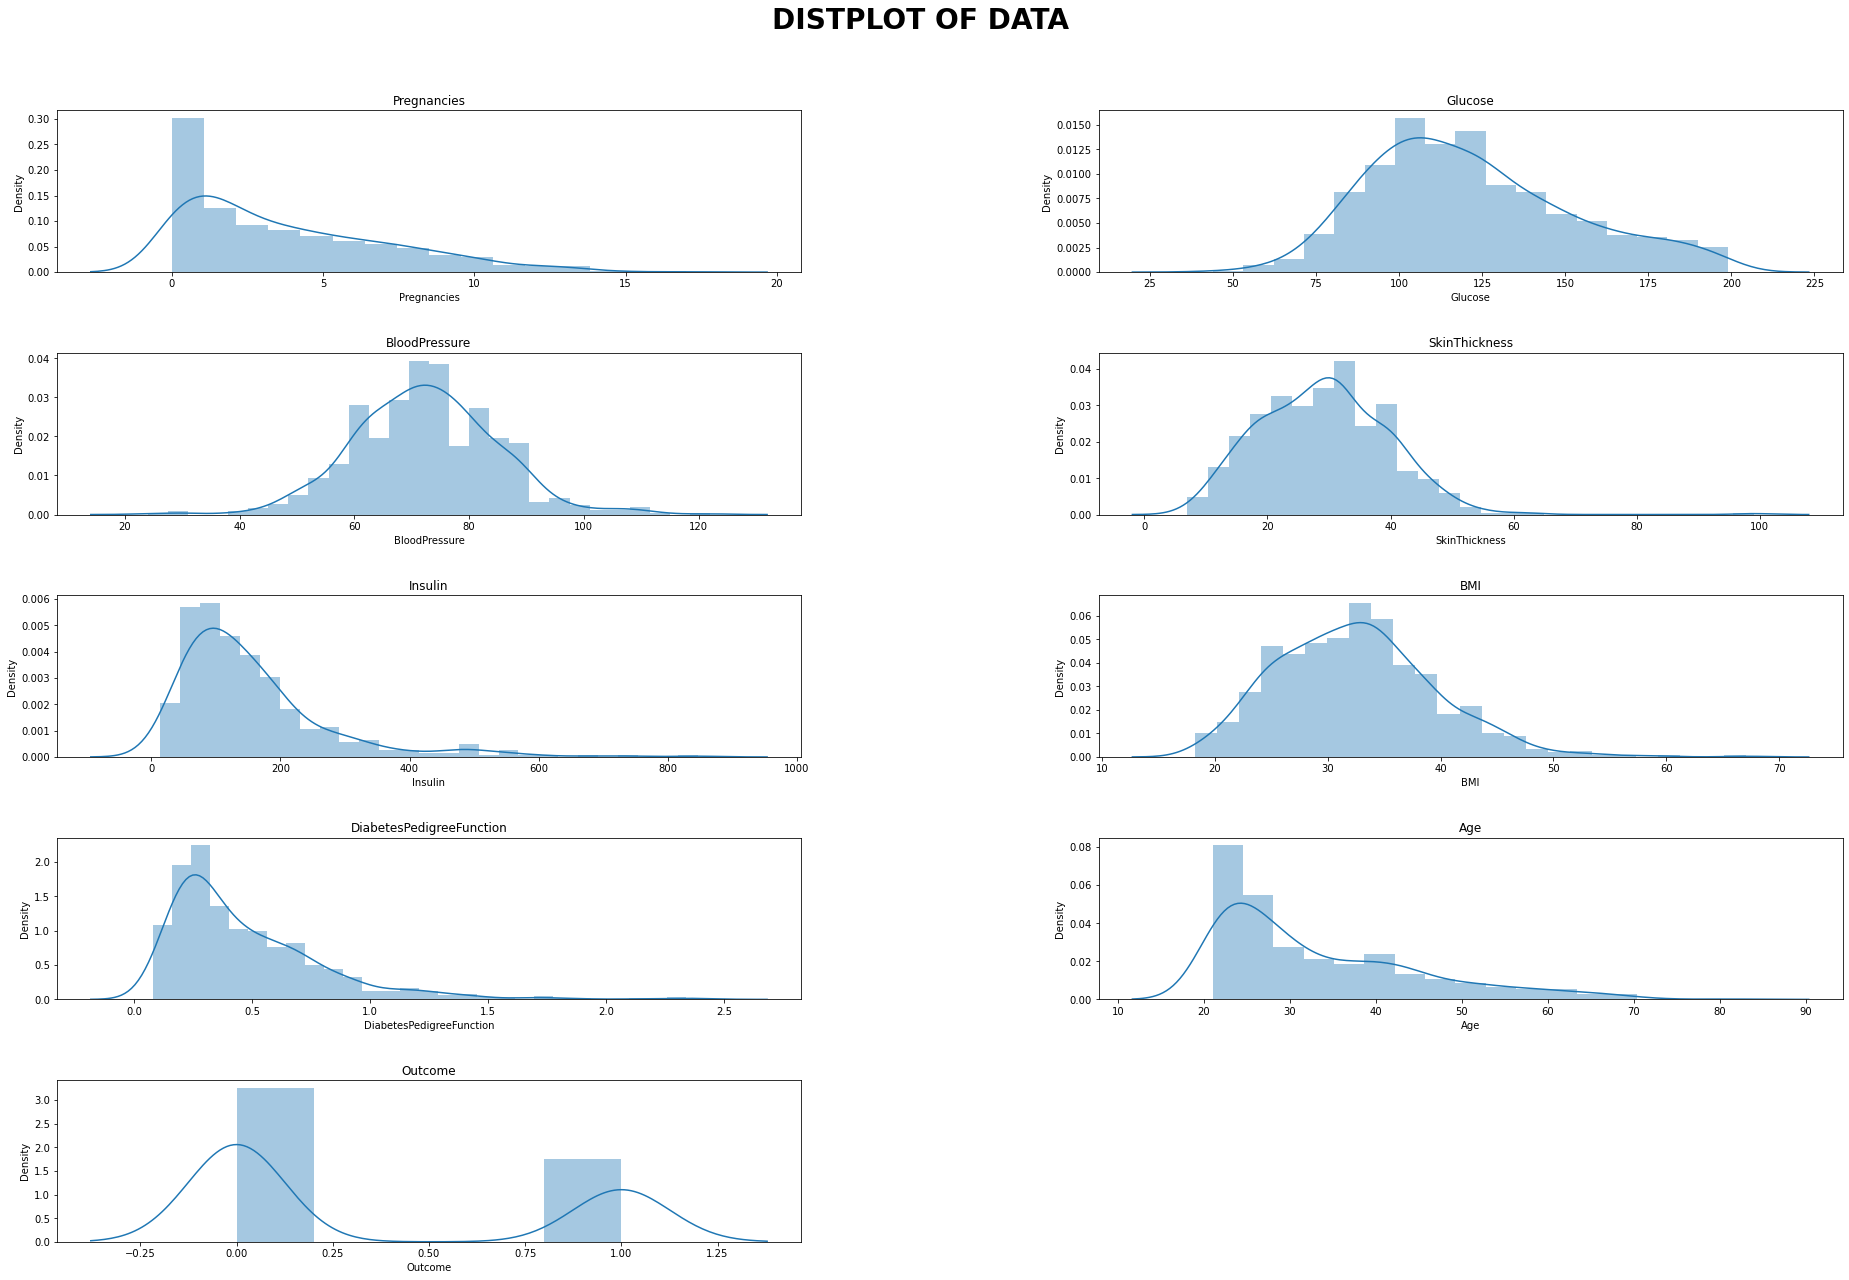

In [18]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(data_c.columns):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.distplot(data_c[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

In [19]:
def plot_dist(col,df):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    ax1 =sns.distplot(df[col],ax=ax1) 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}') 
    ax2 = sns.boxplot(data = df, x=col,ax=ax2);
    ax2.set_title(f'{col}') 
    ax2.set_xlabel(f'{col}')
    plt.figure(figsize=(30, 15))
    plt.show()

**with respect to Pregnancies**

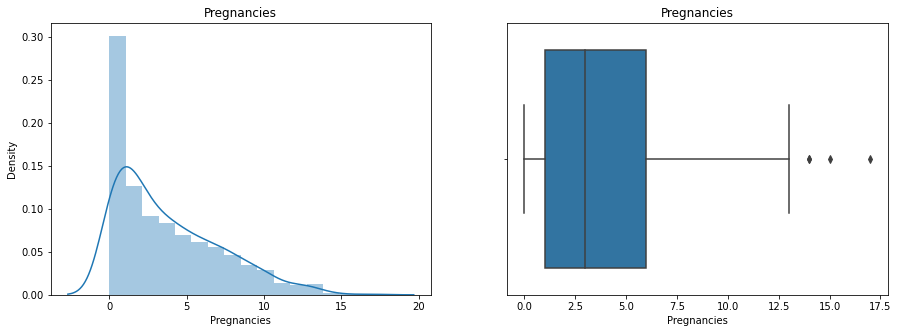

<Figure size 2160x1080 with 0 Axes>

In [20]:
plot_dist("Pregnancies",data_c)

In [21]:
q1=data_c["Pregnancies"].quantile(0.25)
q3=data_c["Pregnancies"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [22]:
lower_fence,upper_fence

(-6.5, 13.5)

In [23]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [24]:
# extreme outliers
lower_extreme,upper_extreme

(-14.0, 21.0)

In [25]:
data_c["Pregnancies"].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [26]:
data_c.loc[data_c["Pregnancies"]>=upper_fence,"Pregnancies"]=upper_fence

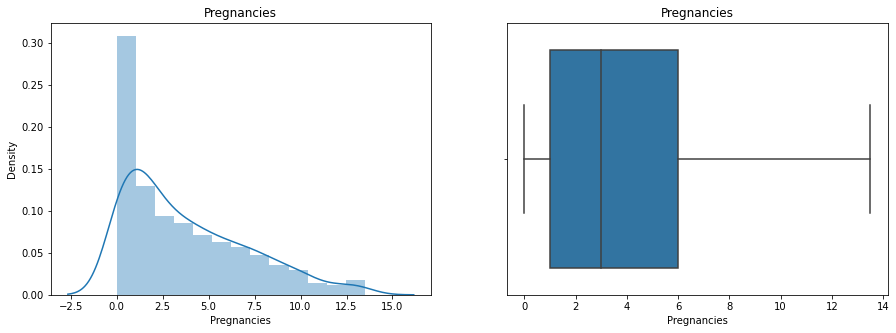

<Figure size 2160x1080 with 0 Axes>

In [27]:
plot_dist("Pregnancies",data_c)

**with respect to Glucose**

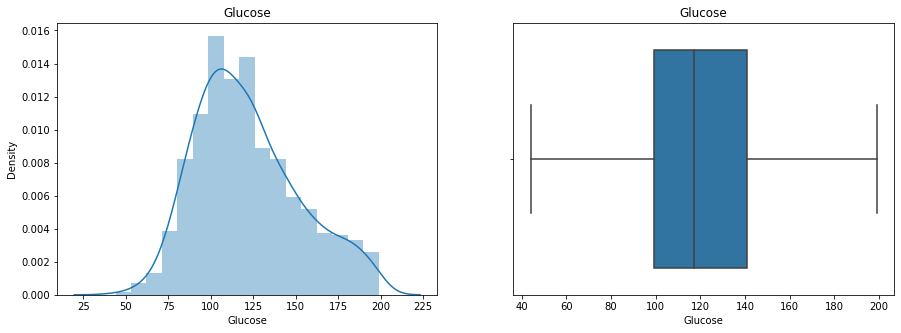

<Figure size 2160x1080 with 0 Axes>

In [28]:
plot_dist("Glucose",data_c)

In [29]:
# the distribution is almost normal distribution (no outlier)

**with respect to BloodPressure**

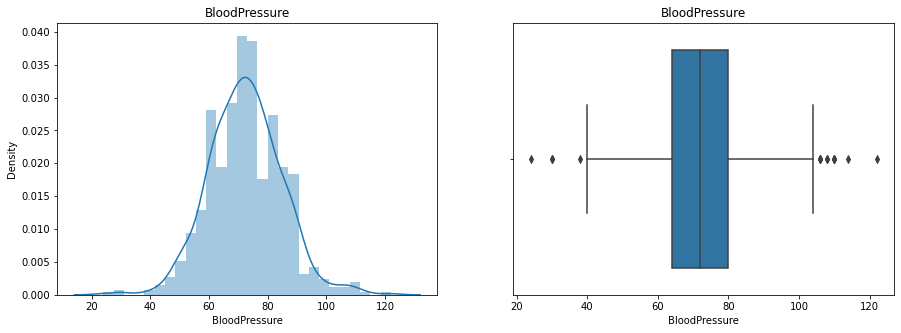

<Figure size 2160x1080 with 0 Axes>

In [30]:
plot_dist("BloodPressure",data_c)

In [31]:
# the distribution is almost normal distribution
# but we need to handel it

In [32]:
data_c["BloodPressure"].describe()

count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [33]:
BloodPressure_mean=data_c.BloodPressure.mean()
BloodPressure_mean

72.40518417462484

In [34]:
upper_boundary=BloodPressure_mean +3*data_c.BloodPressure.std()
lower_boundary=BloodPressure_mean -3*data_c.BloodPressure.std()

In [35]:
lower_boundary,upper_boundary

(35.25870954430904, 109.55165880494063)

In [36]:
data_c['BloodPressure'] = np.where(
    df['BloodPressure']>upper_boundary,
    upper_boundary,
    np.where(
        data_c['BloodPressure']<lower_boundary,
        lower_boundary,
        data_c['BloodPressure']
    )
)

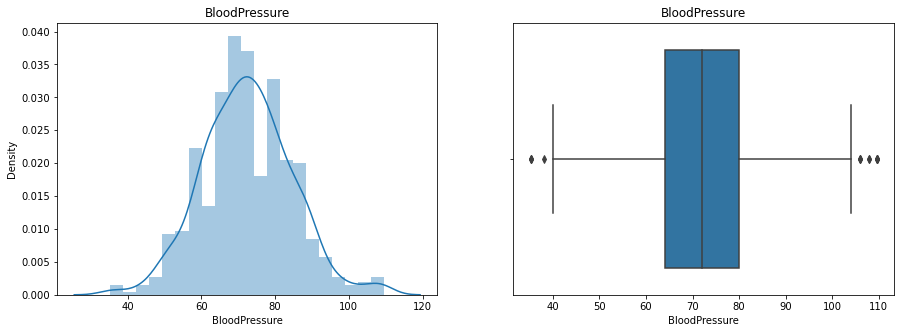

<Figure size 2160x1080 with 0 Axes>

In [37]:
plot_dist("BloodPressure",data_c)

In [38]:
# most of the outliers are handled 

**with respect to SkinThickness**

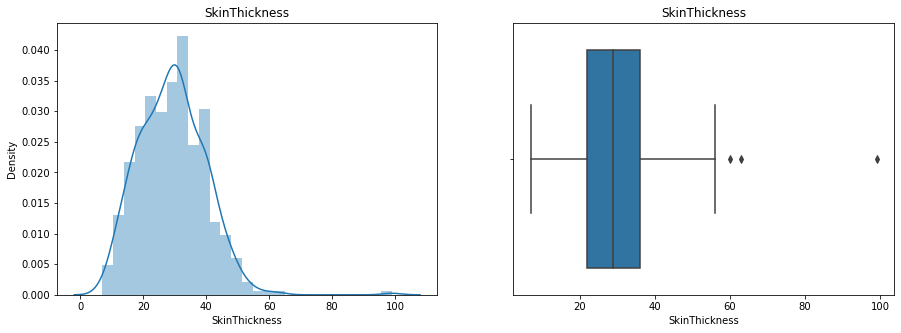

<Figure size 2160x1080 with 0 Axes>

In [39]:
plot_dist("SkinThickness",data_c)

In [40]:
# righly skewed

In [41]:
q1=data_c["SkinThickness"].quantile(0.25)
q3=data_c["SkinThickness"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [42]:
lower_fence,upper_fence

(1.0, 57.0)

In [43]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [44]:
# extreme outliers
lower_extreme,upper_extreme

(-20.0, 78.0)

In [45]:
data_c["SkinThickness"].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [46]:
data_c.loc[data_c["SkinThickness"]>=upper_fence,"SkinThickness"]=upper_fence

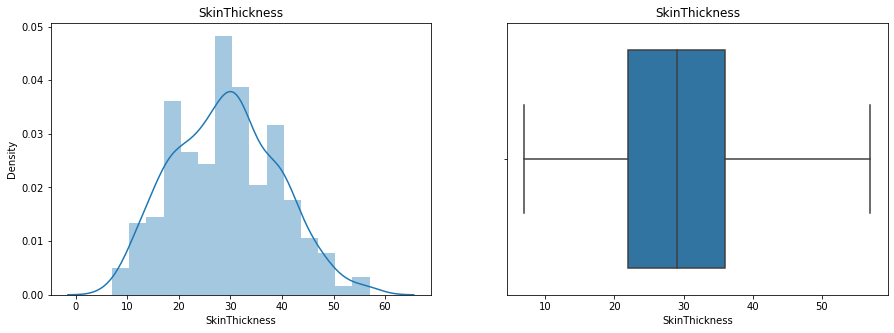

<Figure size 2160x1080 with 0 Axes>

In [47]:
plot_dist("SkinThickness",data_c)

**with respect to Insulin**

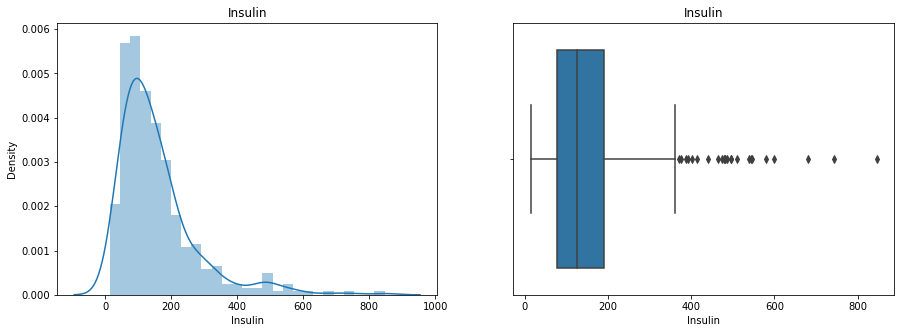

<Figure size 2160x1080 with 0 Axes>

In [48]:
plot_dist("Insulin",data_c)

In [49]:



# there are too many outliers  

In [50]:
q1=data_c["Insulin"].quantile(0.25)
q3=data_c["Insulin"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [51]:
lower_fence,upper_fence

(-94.375, 360.625)

In [52]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [53]:
# extreme outliers
lower_extreme,upper_extreme

(-265.0, 531.25)

In [54]:
data_c["Insulin"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [55]:
data_c.loc[data_c["Insulin"]>=upper_extreme,"Insulin"]=upper_extreme

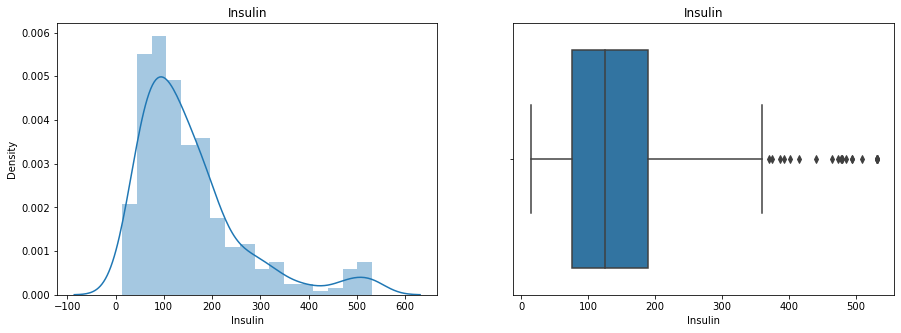

<Figure size 2160x1080 with 0 Axes>

In [56]:
plot_dist("Insulin",data_c)

In [57]:
# as there are many points we can't consider all the points as outliers

**with respect to BMI**

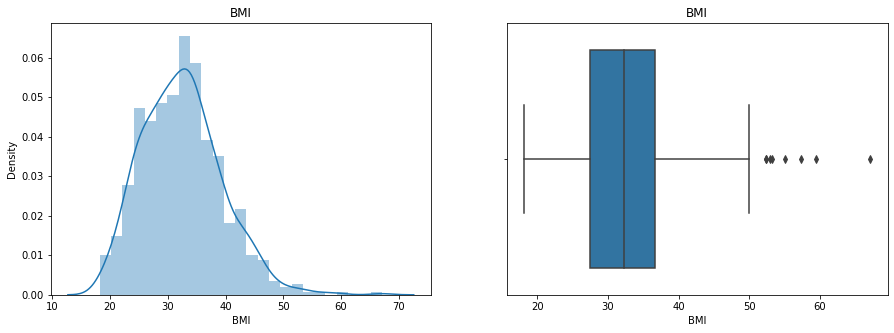

<Figure size 2160x1080 with 0 Axes>

In [58]:
plot_dist("BMI",data_c)

In [59]:
q1=data_c["BMI"].quantile(0.25)
q3=data_c["BMI"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [60]:
lower_fence,upper_fence

(13.849999999999998, 50.25)

In [61]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [62]:
# extreme outliers
lower_extreme,upper_extreme

(0.19999999999999574, 63.900000000000006)

In [63]:
data_c["BMI"].describe()

count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [64]:
data_c.loc[data_c["BMI"]>=upper_fence,"BMI"]=upper_fence

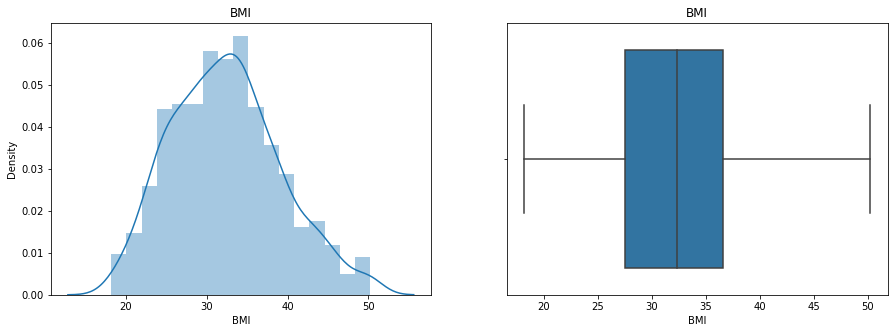

<Figure size 2160x1080 with 0 Axes>

In [65]:
plot_dist("BMI",data_c)

**with respect to DiabetesPedigreeFunction**

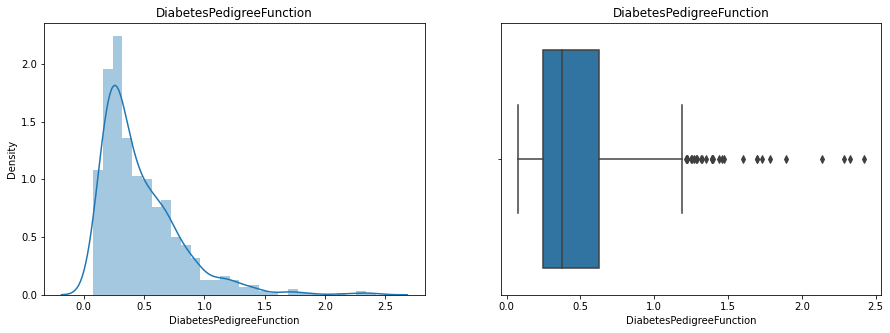

<Figure size 2160x1080 with 0 Axes>

In [66]:
plot_dist("DiabetesPedigreeFunction",data_c)

In [67]:
q1=data_c["DiabetesPedigreeFunction"].quantile(0.25)
q3=data_c["DiabetesPedigreeFunction"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [68]:
lower_fence,upper_fence

(-0.32999999999999996, 1.2)

In [69]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [70]:
# extreme outliers
lower_extreme,upper_extreme

(-0.9037499999999999, 1.77375)

In [71]:
data_c["DiabetesPedigreeFunction"].describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [72]:
data_c.loc[data_c["DiabetesPedigreeFunction"]>=upper_extreme,"DiabetesPedigreeFunction"]=upper_extreme

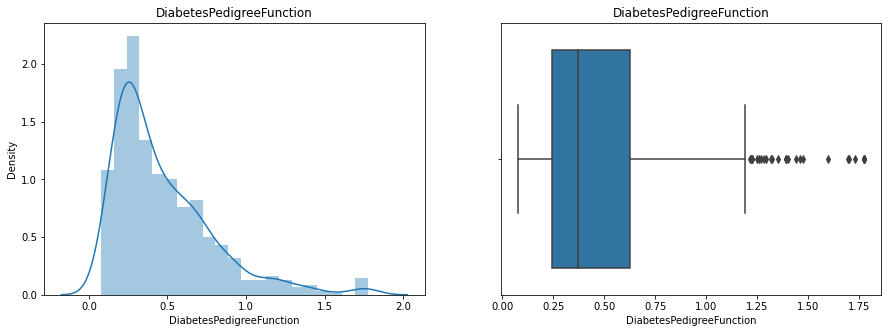

<Figure size 2160x1080 with 0 Axes>

In [73]:
plot_dist("DiabetesPedigreeFunction",data_c)

**with respect to age**

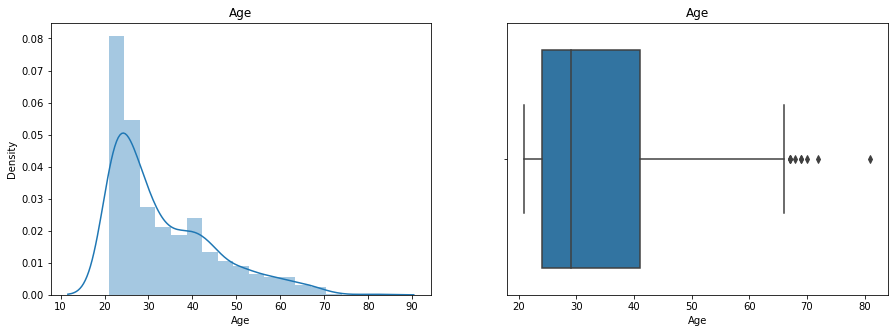

<Figure size 2160x1080 with 0 Axes>

In [74]:
plot_dist("Age",data_c)

In [75]:
q1=data_c["Age"].quantile(0.25)
q3=data_c["Age"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [76]:
lower_fence,upper_fence

(-1.5, 66.5)

In [77]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [78]:
# extreme outliers
lower_extreme,upper_extreme

(-27.0, 92.0)

In [79]:
data_c["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [80]:
data_c.loc[data_c["Age"]>=upper_fence,"Age"]=upper_fence

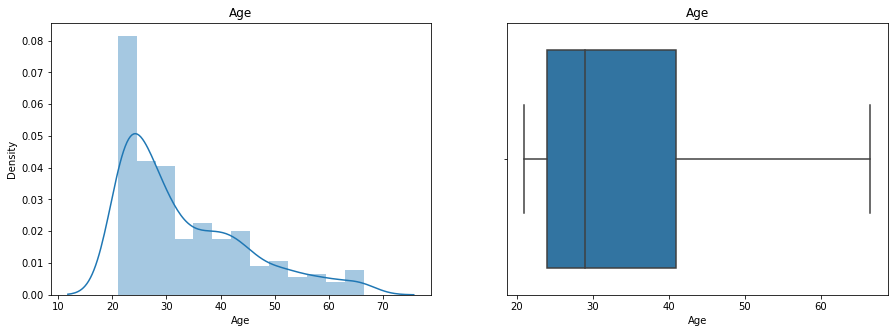

<Figure size 2160x1080 with 0 Axes>

In [81]:
plot_dist("Age",data_c)

In [82]:
# all the outliers are handled

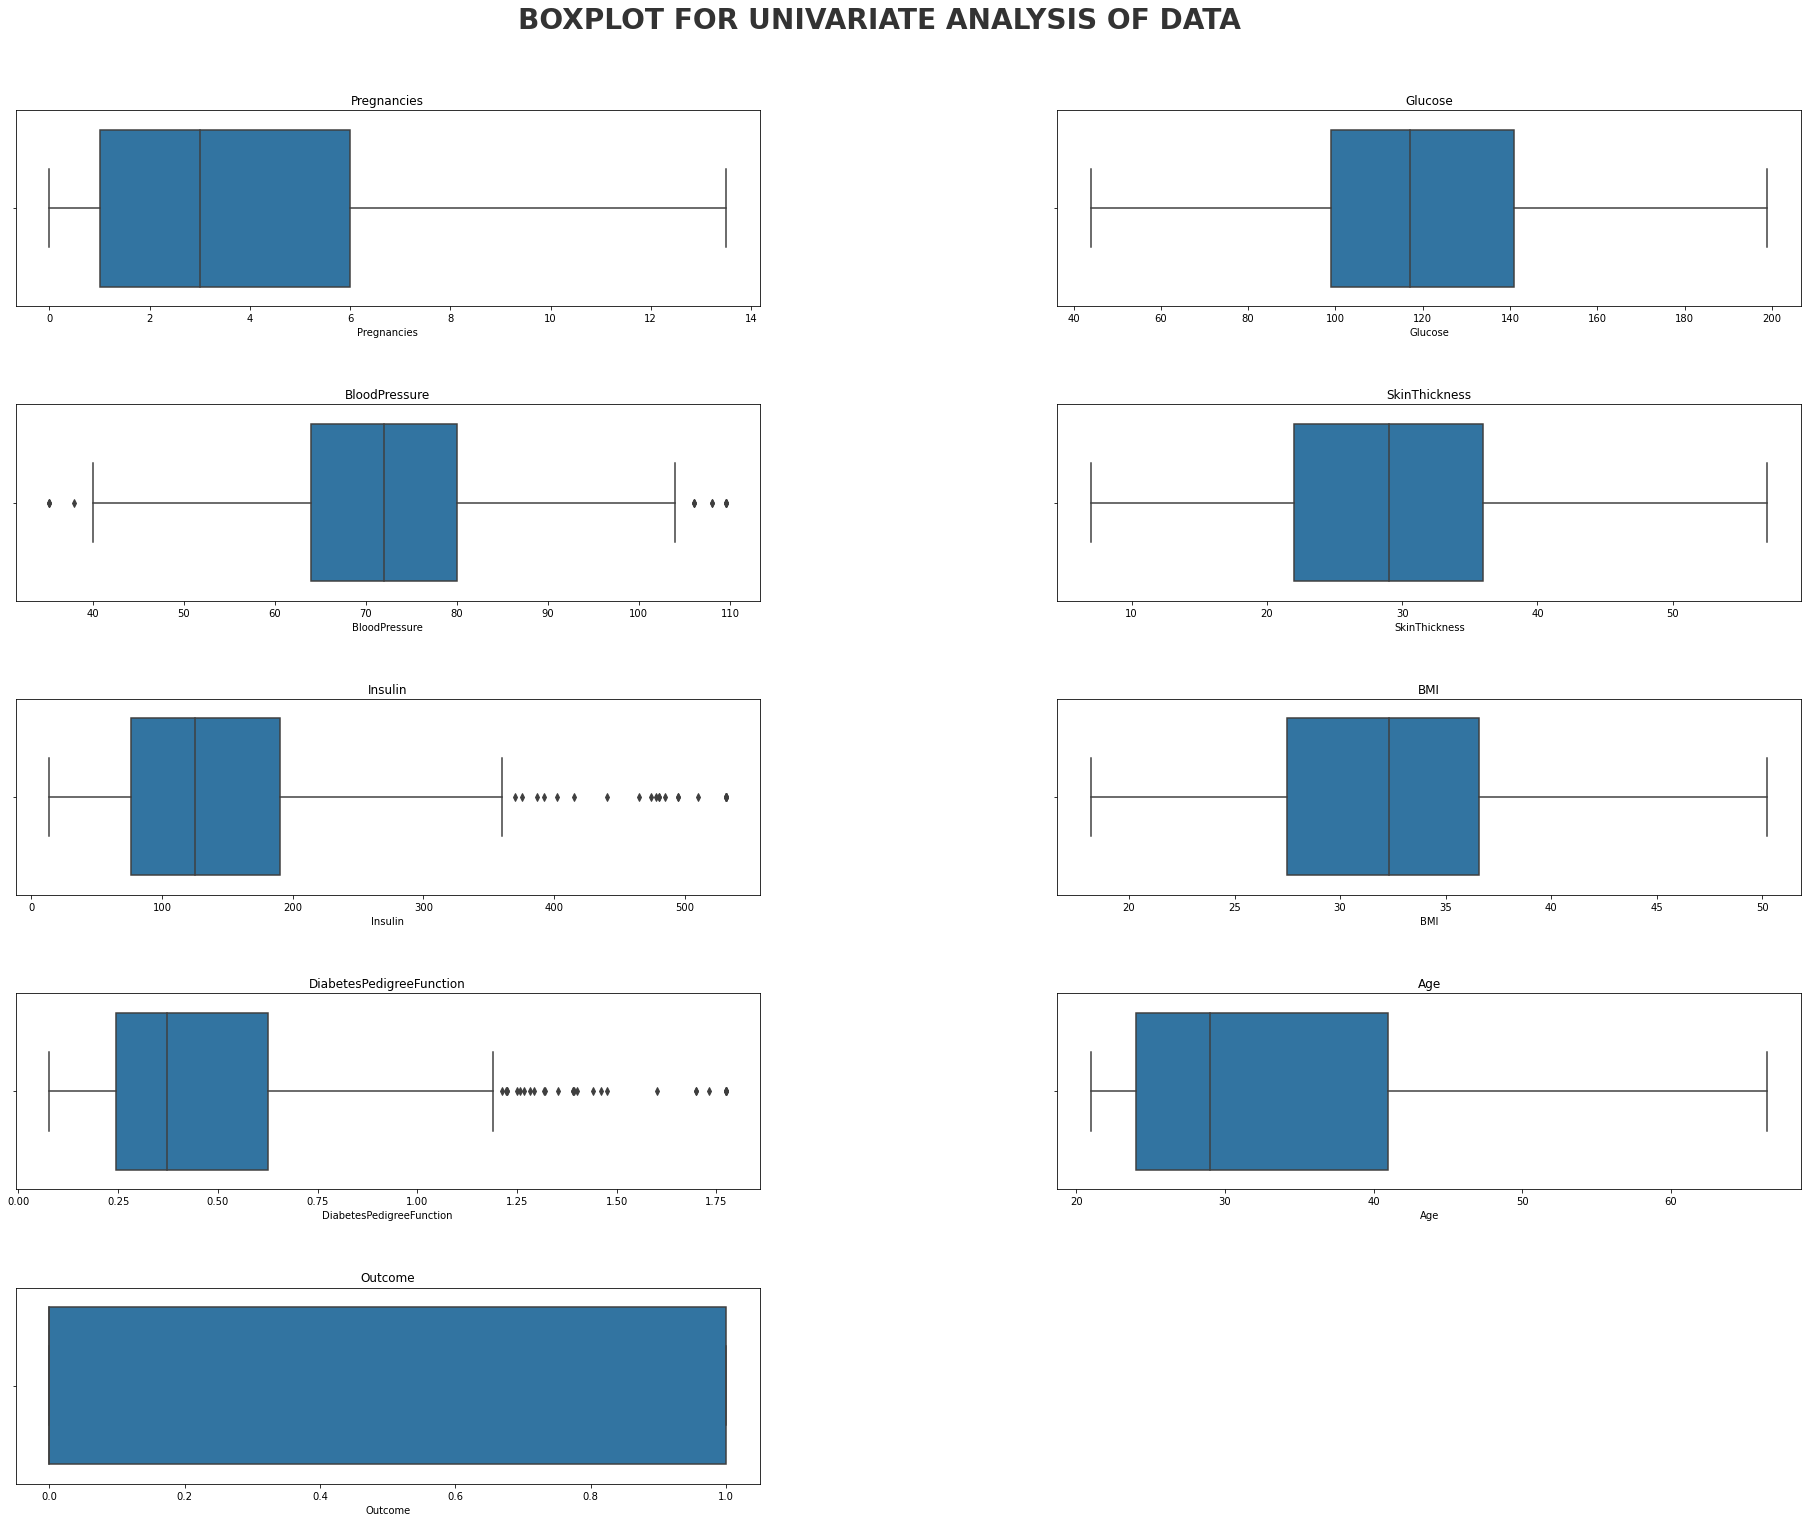

In [83]:
features = data_c.columns
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data =data_c, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

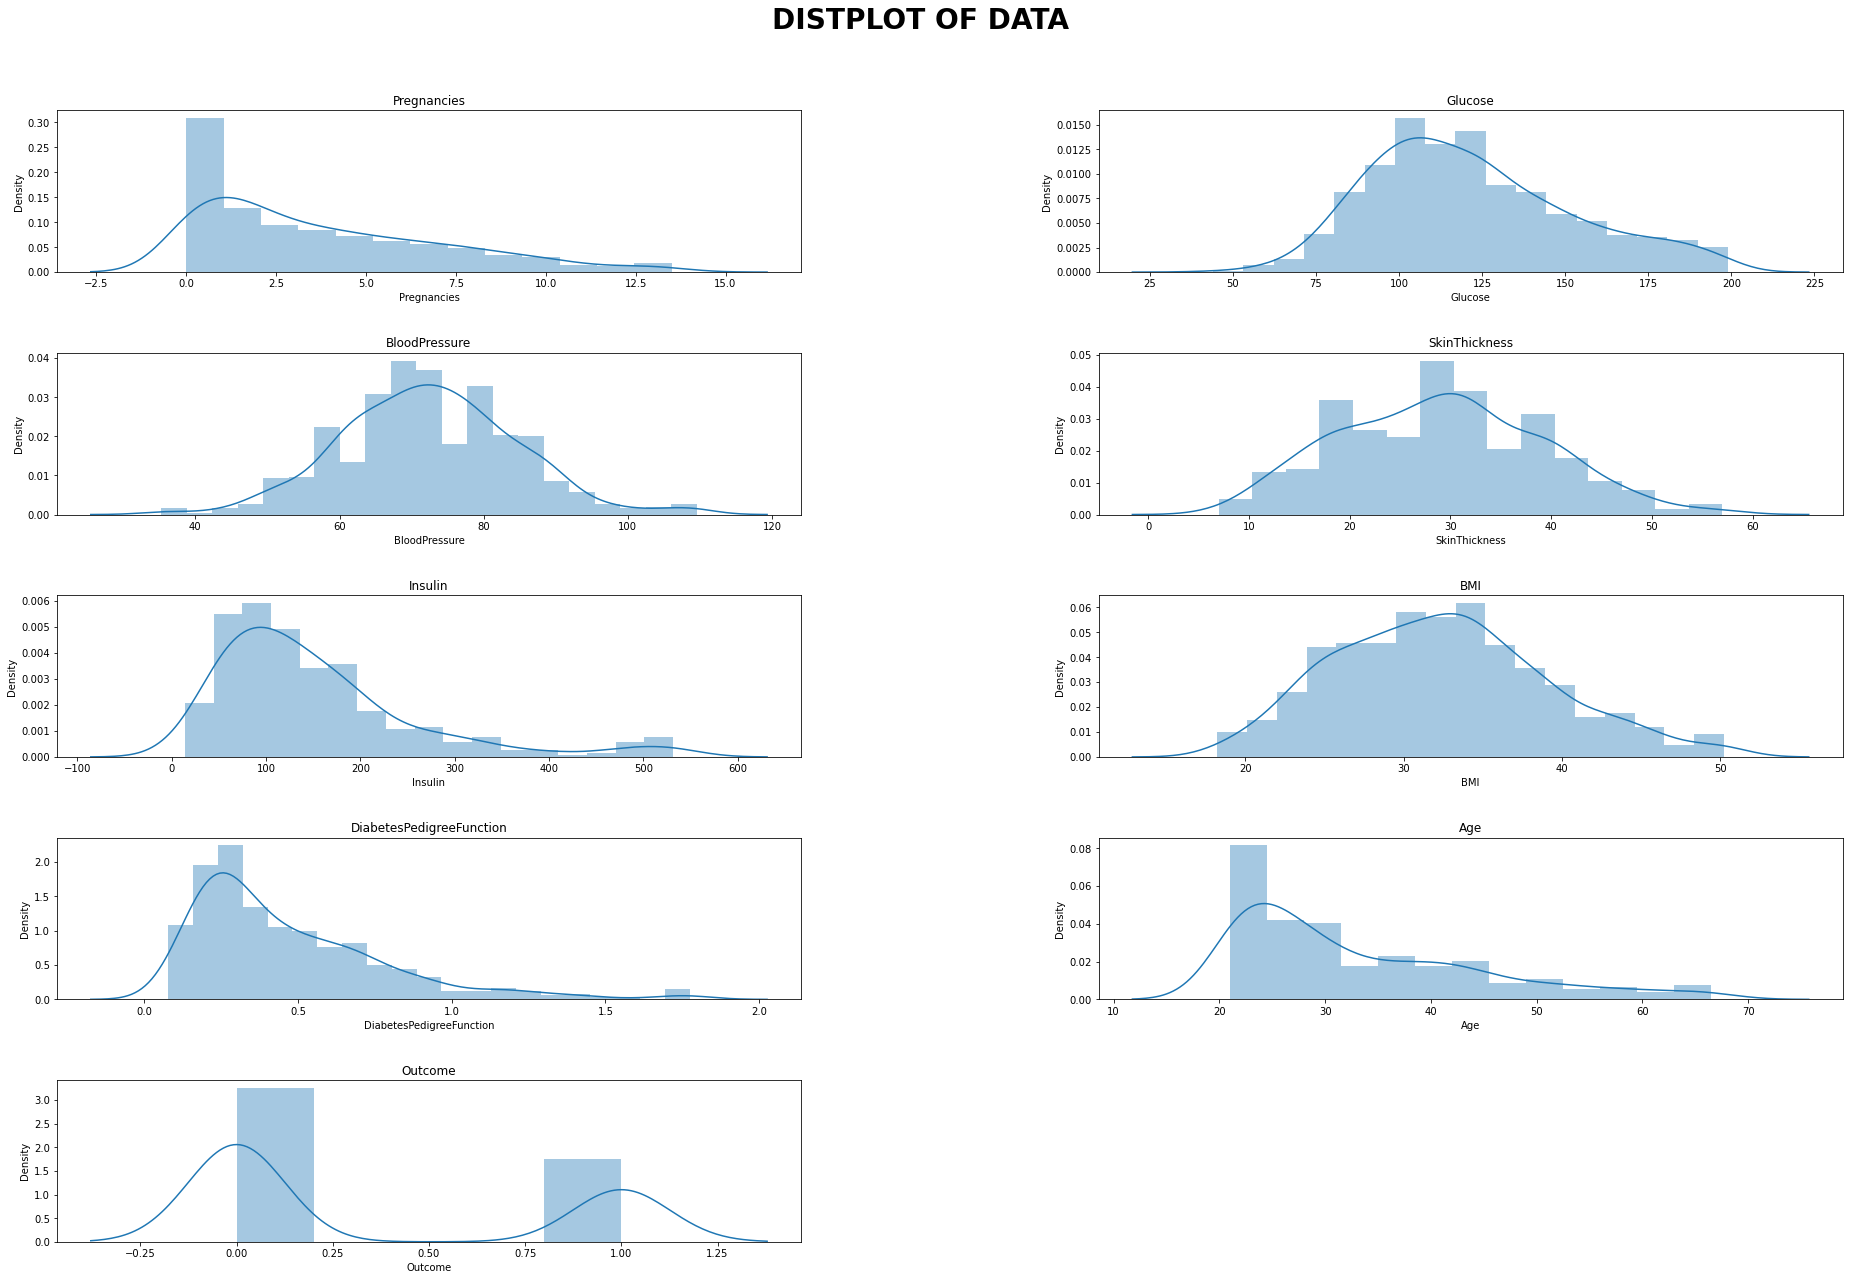

In [84]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(data_c.columns):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.distplot(data_c[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

In [85]:
data_c.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Transformation**

In [86]:
# Insulin and DiabetesPedigreeFunction are righly skeweda and  still have lot of outliers so we are going to use transformation

 with respect to DiabetesPedigreeFunction

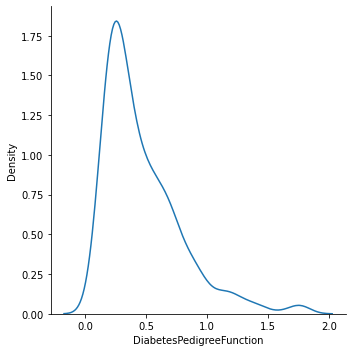

In [87]:
sns.displot(data_c["DiabetesPedigreeFunction"],kind="kde")

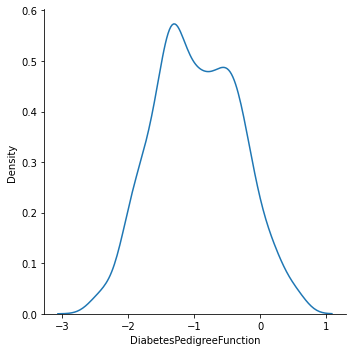

In [89]:
sns.displot(np.log(data_c["DiabetesPedigreeFunction"]),kind="kde")

In [94]:
#its look good

In [95]:
data_c["DiabetesPedigreeFunction"]=np.log(data_c["DiabetesPedigreeFunction"])

with respect to Insulin

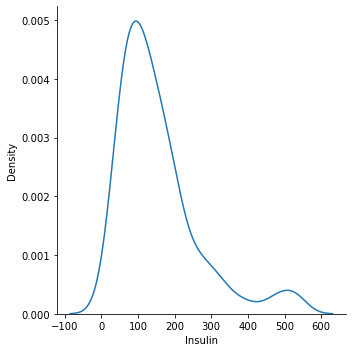

In [96]:
sns.displot(data_c["Insulin"],kind="kde")

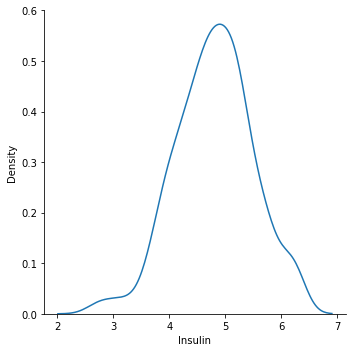

In [97]:
sns.displot(np.log(data_c["Insulin"]),kind="kde")

In [98]:
data_c["Insulin"]=np.log(data_c["Insulin"])

In [99]:
# still it has outliers but most of the outliers are handled.., we are good to go

# Handling missing value

In [100]:
####  spliting the values

In [101]:
data_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,-0.466809,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,-1.046969,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,-0.397497,32.0,1
3,1.0,89.0,66.0,23.0,4.543295,28.1,-1.789761,21.0,0
4,0.0,137.0,40.0,35.0,5.123964,43.1,0.573096,33.0,1


In [102]:
from sklearn.model_selection import StratifiedShuffleSplit

In [103]:
# on the basis of the target we are spliting our data
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index,test_index in split.split(data_c,data_c["Outcome"]):
    strat_train_set=data_c.loc[train_index]
    strat_test_set=data_c.loc[test_index]

In [104]:
strat_train_set["Outcome"].value_counts()

0    350
1    187
Name: Outcome, dtype: int64

In [105]:
strat_test_set["Outcome"].value_counts()

0    150
1     81
Name: Outcome, dtype: int64

In [106]:
x_train=strat_train_set.drop("Outcome",axis=1)

In [107]:
y_train=strat_train_set["Outcome"]

In [108]:
x_test=strat_test_set.drop("Outcome",axis=1)

In [109]:
y_test=strat_test_set["Outcome"]

#### handeling null values

In [110]:
data_c.isna().mean()

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [111]:
def impute_nan(df,variable,median):
    df[variable]=df[variable].fillna(median)

In [112]:
median=x_train.Glucose.median()
impute_nan(x_train,'Glucose',median)
impute_nan(x_test,'Glucose',median)

In [113]:
median=x_train.BloodPressure.median()
impute_nan(x_train,'BloodPressure',median)
impute_nan(x_test,'BloodPressure',median)

In [114]:
median=x_train.SkinThickness.median()
impute_nan(x_train,'SkinThickness',median)
impute_nan(x_test,'SkinThickness',median)

In [115]:
median=x_train.Insulin.median()
impute_nan(x_train,'Insulin',median)
impute_nan(x_test,'Insulin',median)

In [116]:
median=x_train.BMI.median()
impute_nan(x_train,'BMI',median)
impute_nan(x_test,'BMI',median)

In [117]:
x_train.isna().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [118]:
x_test.isna().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [119]:
#### checking the distribution after  imputation

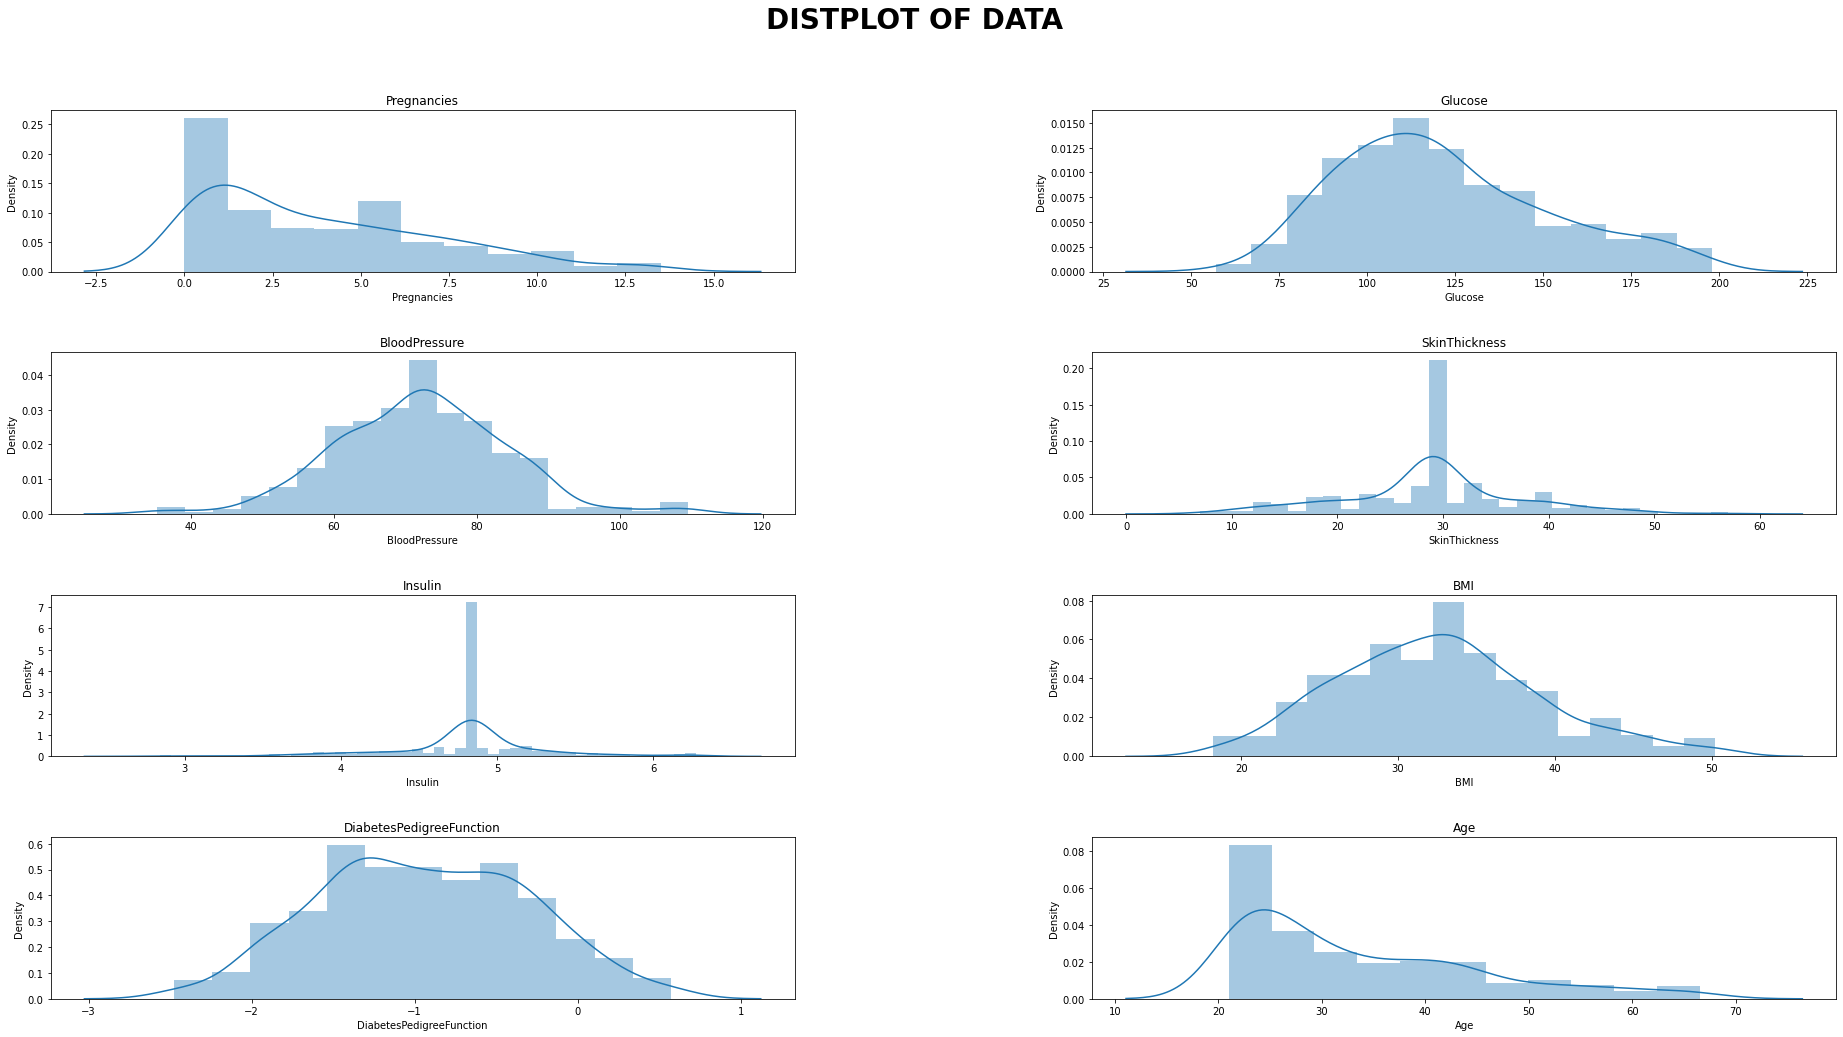

In [120]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(x_train.columns):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.distplot(x_train[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

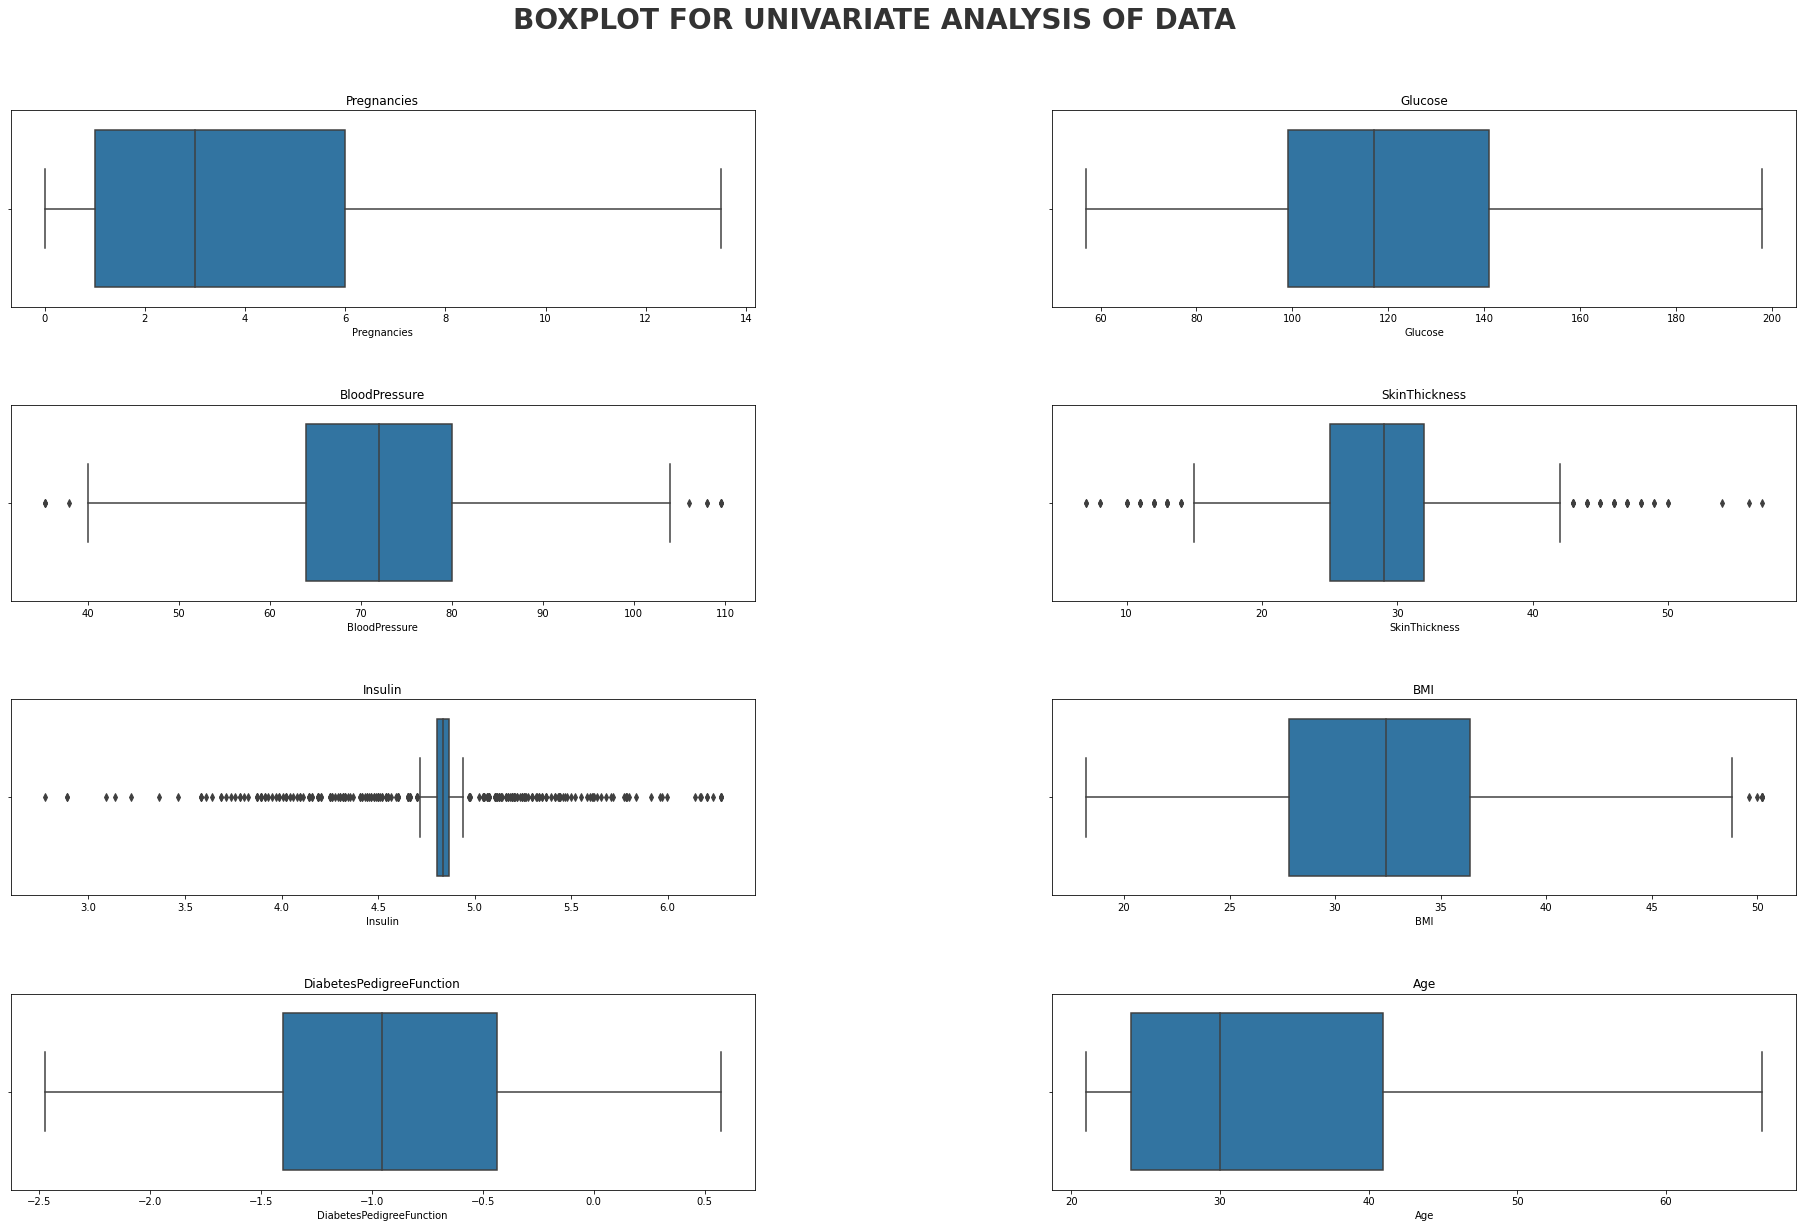

In [121]:
features = x_train.columns
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data =x_train, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

In [122]:
# we should not use median for insuline and skinthickness for inputation

In [123]:
x_train=strat_train_set.drop("Outcome",axis=1)
y_train=strat_train_set["Outcome"]
x_test=strat_test_set.drop("Outcome",axis=1)
y_test=strat_test_set["Outcome"]

In [124]:
 def impute_nan(df,variable,median):
    df[variable]=df[variable].fillna(median)

In [125]:
median=x_train.Glucose.median()
impute_nan(x_train,'Glucose',median)
impute_nan(x_test,'Glucose',median)

In [126]:
median=x_train.BloodPressure.median()
impute_nan(x_train,'BloodPressure',median)
impute_nan(x_test,'BloodPressure',median)

In [127]:
median=x_train.BMI.median()
impute_nan(x_train,'BMI',median)
impute_nan(x_test,'BMI',median)

In [128]:
x_train.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               157
Insulin                     256
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [129]:
# now we have to deal with SkinThickness and insuline

In [130]:
from sklearn.impute import KNNImputer

In [131]:
knn = KNNImputer() # with default parameter
x_train_trf=knn.fit_transform(x_train)
x_test_trf=knn.transform(x_test)

In [132]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [133]:
new_x_train=pd.DataFrame(x_train_trf,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [134]:
new_x_test=pd.DataFrame(x_test_trf,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

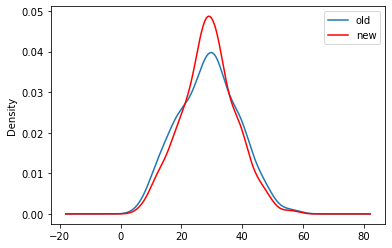

In [135]:
fig = plt.figure()

ax = fig.add_subplot(111)
# orignal 
x_train['SkinThickness'].plot(kind='kde', ax=ax,label="old")
# after knn imputation
new_x_train.SkinThickness.plot(kind='kde', ax=ax, color='red',label="new")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
# distribution is changed 

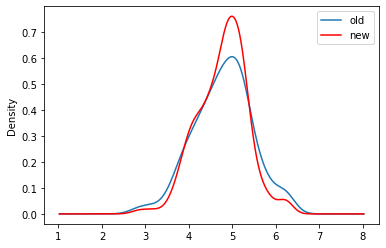

In [136]:
fig = plt.figure()

ax = fig.add_subplot(111)
# orignal 
x_train['Insulin'].plot(kind='kde', ax=ax,label="old")
# after knn imputation
new_x_train.Insulin.plot(kind='kde', ax=ax, color='red',label="new")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
# distribution is changed 

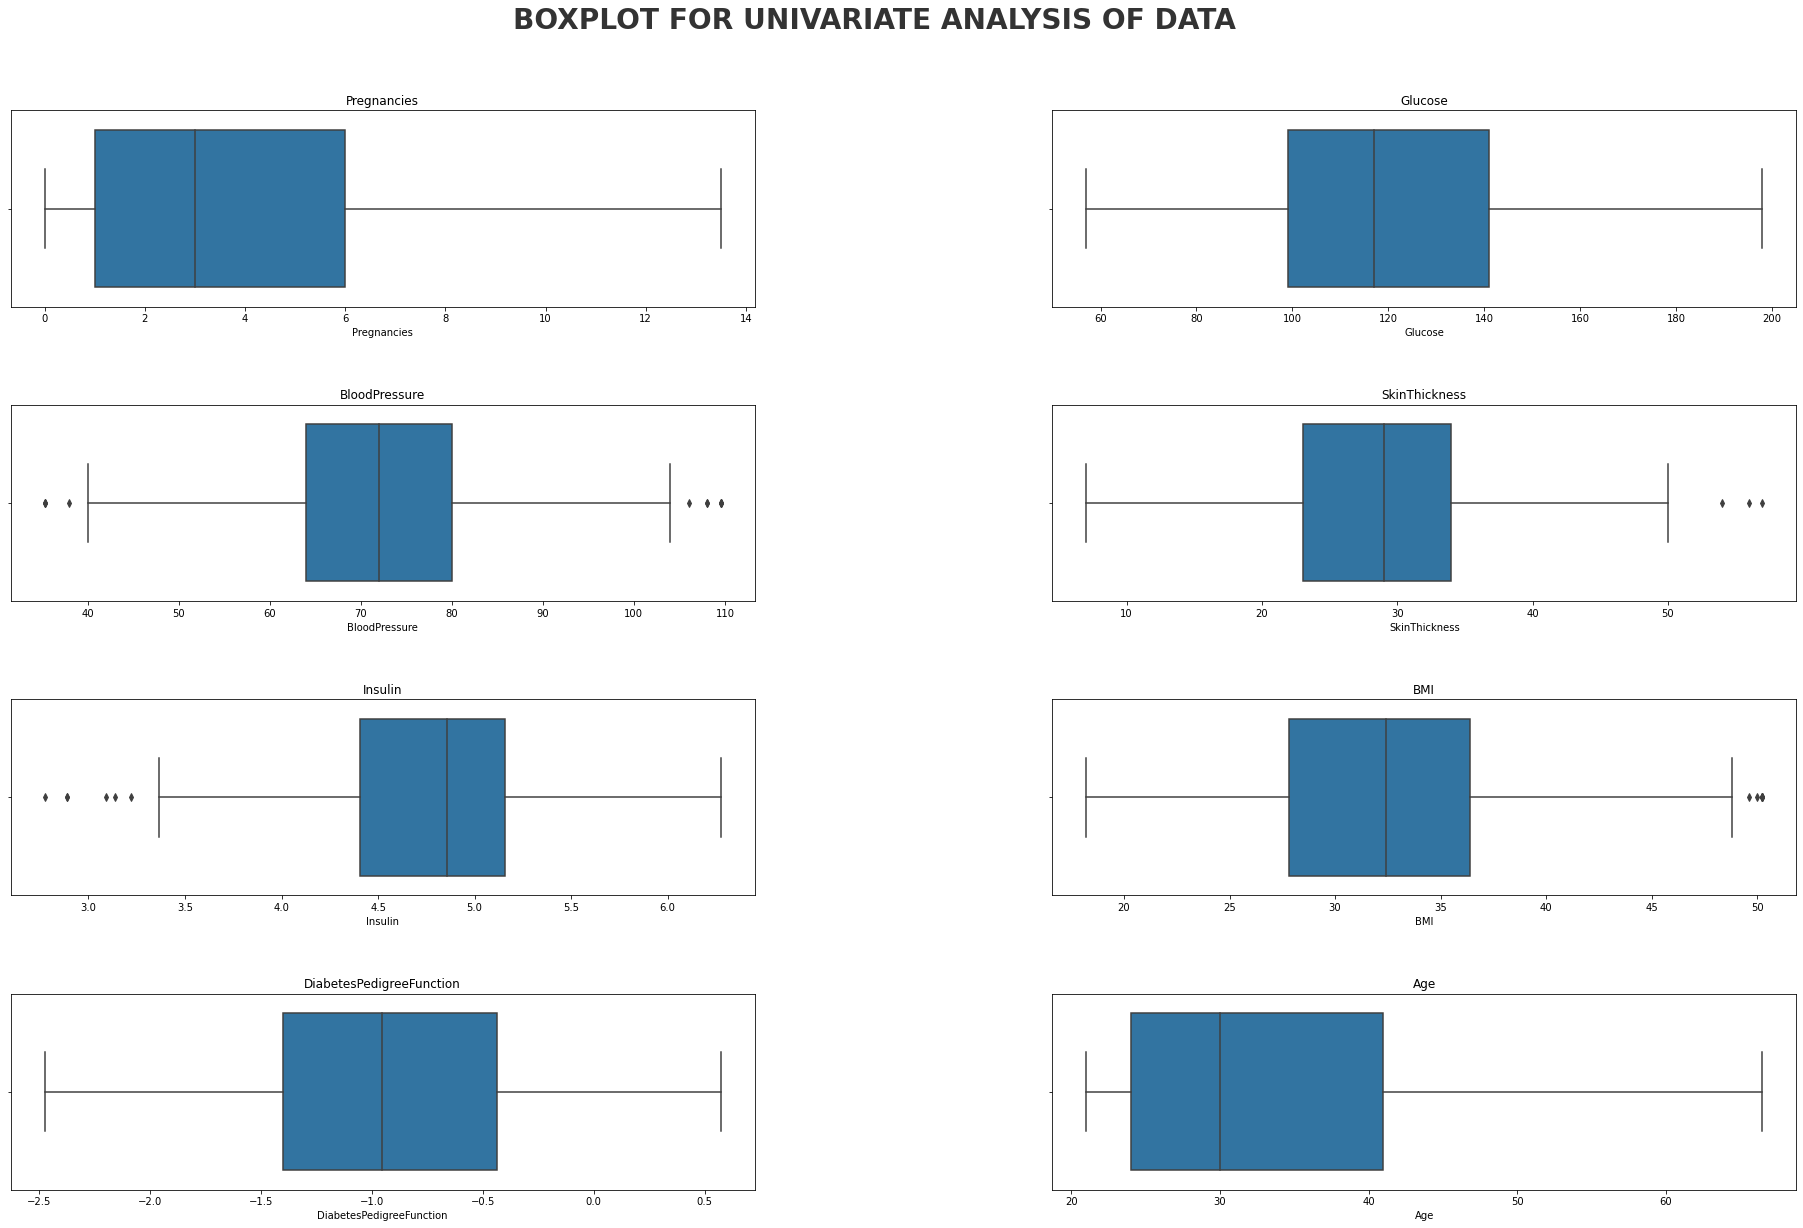

In [137]:
features = new_x_train.columns
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT FOR UNIVARIATE ANALYSIS OF DATA', fontsize=28, fontweight='bold', alpha=0.8,)
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(features):  
    ax1 = fig.add_subplot(5,2, i+1);
    ax1 = sns.boxplot(data =new_x_train, x=col,);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

In [138]:
# now it looks little better then median imputation for SkinThickness and insuline

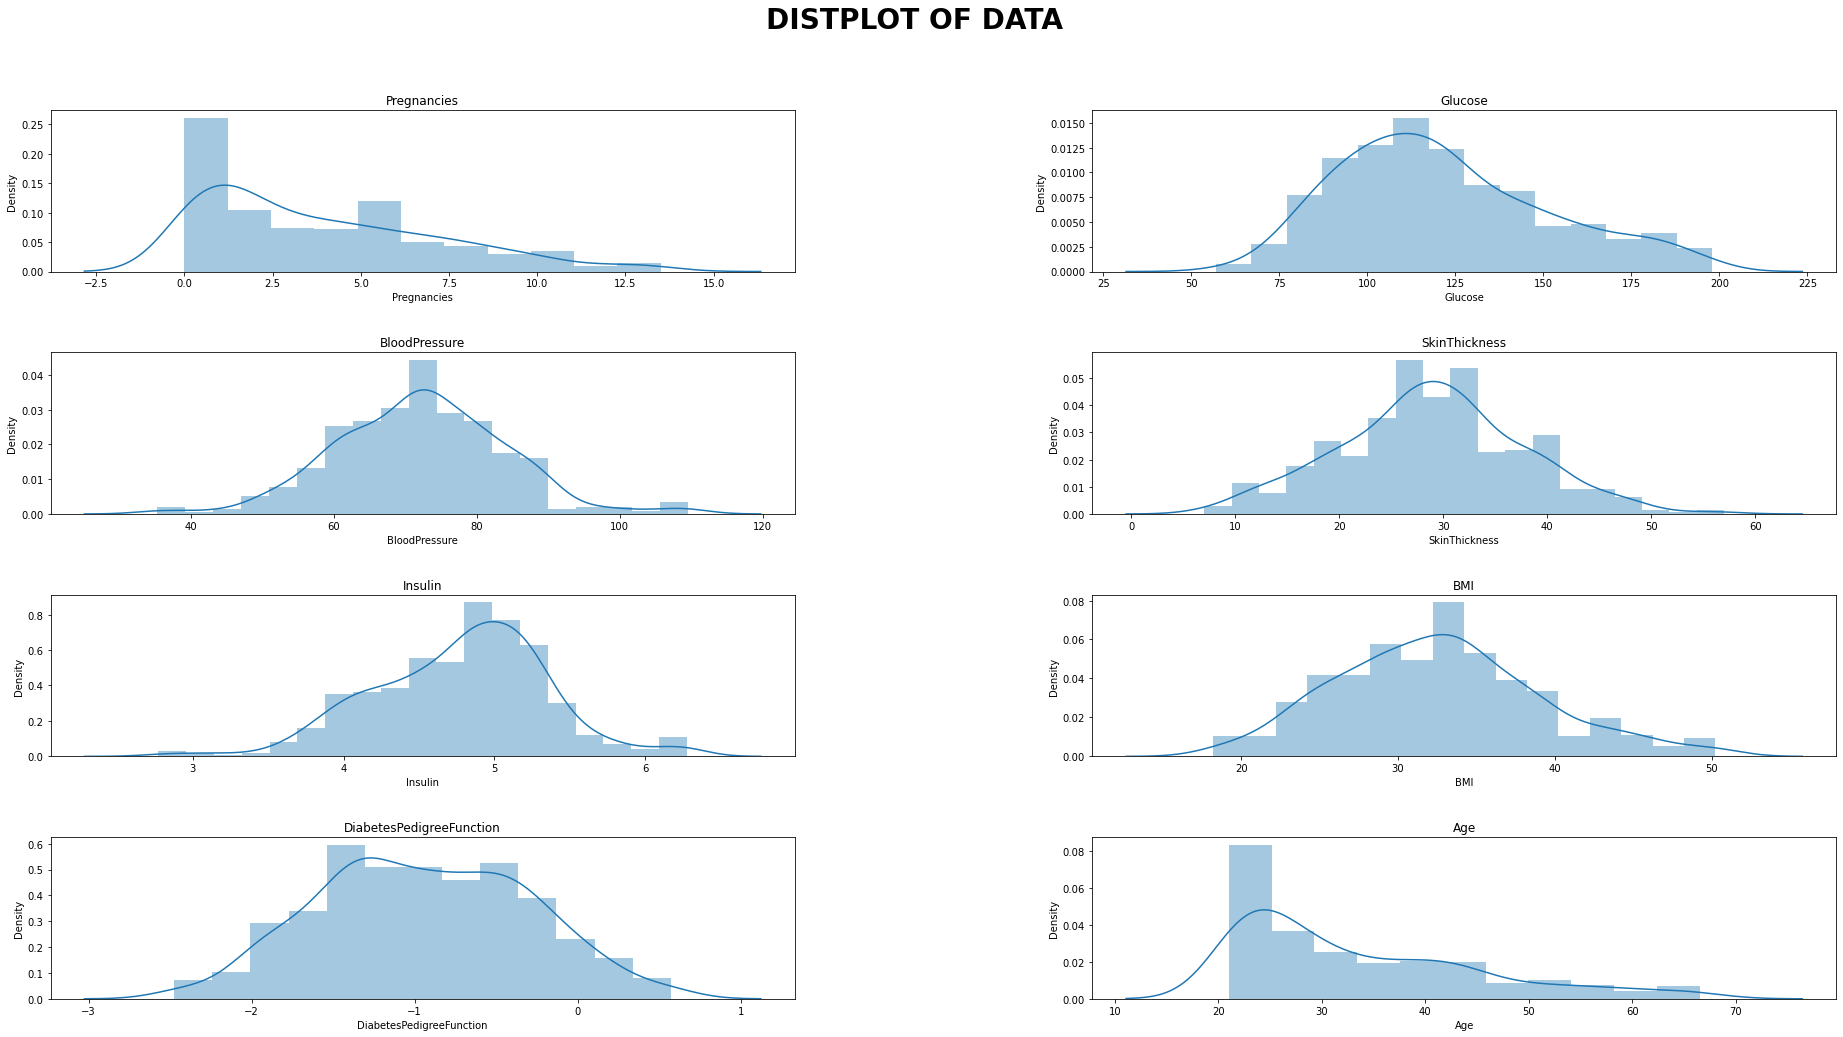

In [139]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('DISTPLOT OF DATA', fontsize=28, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(new_x_train.columns):  
    ax1 = fig.add_subplot(6,2, i+1);
    ax1 = sns.distplot(new_x_train[col]);
 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}')

## Feature selection

**Drop Constant Features Using Variance Threshold**

In [141]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(new_x_train) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [142]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [143]:
## no feature is constant

**pearson correlation**

In [144]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [145]:
# giving threshold 60 percent for the time 
threshold=0.95

In [146]:
correlation(new_x_train.iloc[:,:-1],threshold)

set()

**information gain**

In [147]:
from sklearn.feature_selection import mutual_info_classif # for classification
#from sklearn.feature_selection import mutual_info_regression # for regression problem

In [148]:
mutual_info=mutual_info_classif(new_x_train,y_train)

In [149]:
mutual_data=pd.Series(mutual_info,index=new_x_train.columns)

In [150]:
mutual_data.sort_values(ascending=False)

Insulin                     0.115062
Glucose                     0.095594
BMI                         0.089604
Age                         0.051194
Pregnancies                 0.048916
SkinThickness               0.033502
BloodPressure               0.011334
DiabetesPedigreeFunction    0.000000
dtype: float64

In [151]:
# DiabetesPedigreeFunction  is least correlated feature

**feature Importance**

In [152]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(new_x_train,y_train)

ExtraTreesClassifier()

In [153]:
print(model.feature_importances_)

[0.10941236 0.21482484 0.08780696 0.1030541  0.12970484 0.12573401
 0.1039516  0.12551129]


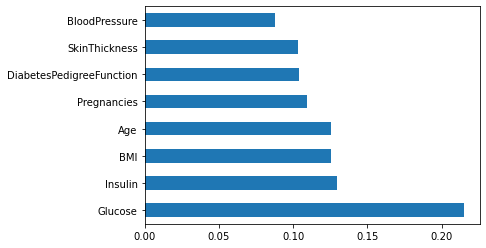

In [154]:
ranked_features=pd.Series(model.feature_importances_,index=new_x_train.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

## independent feature vs dependent feature

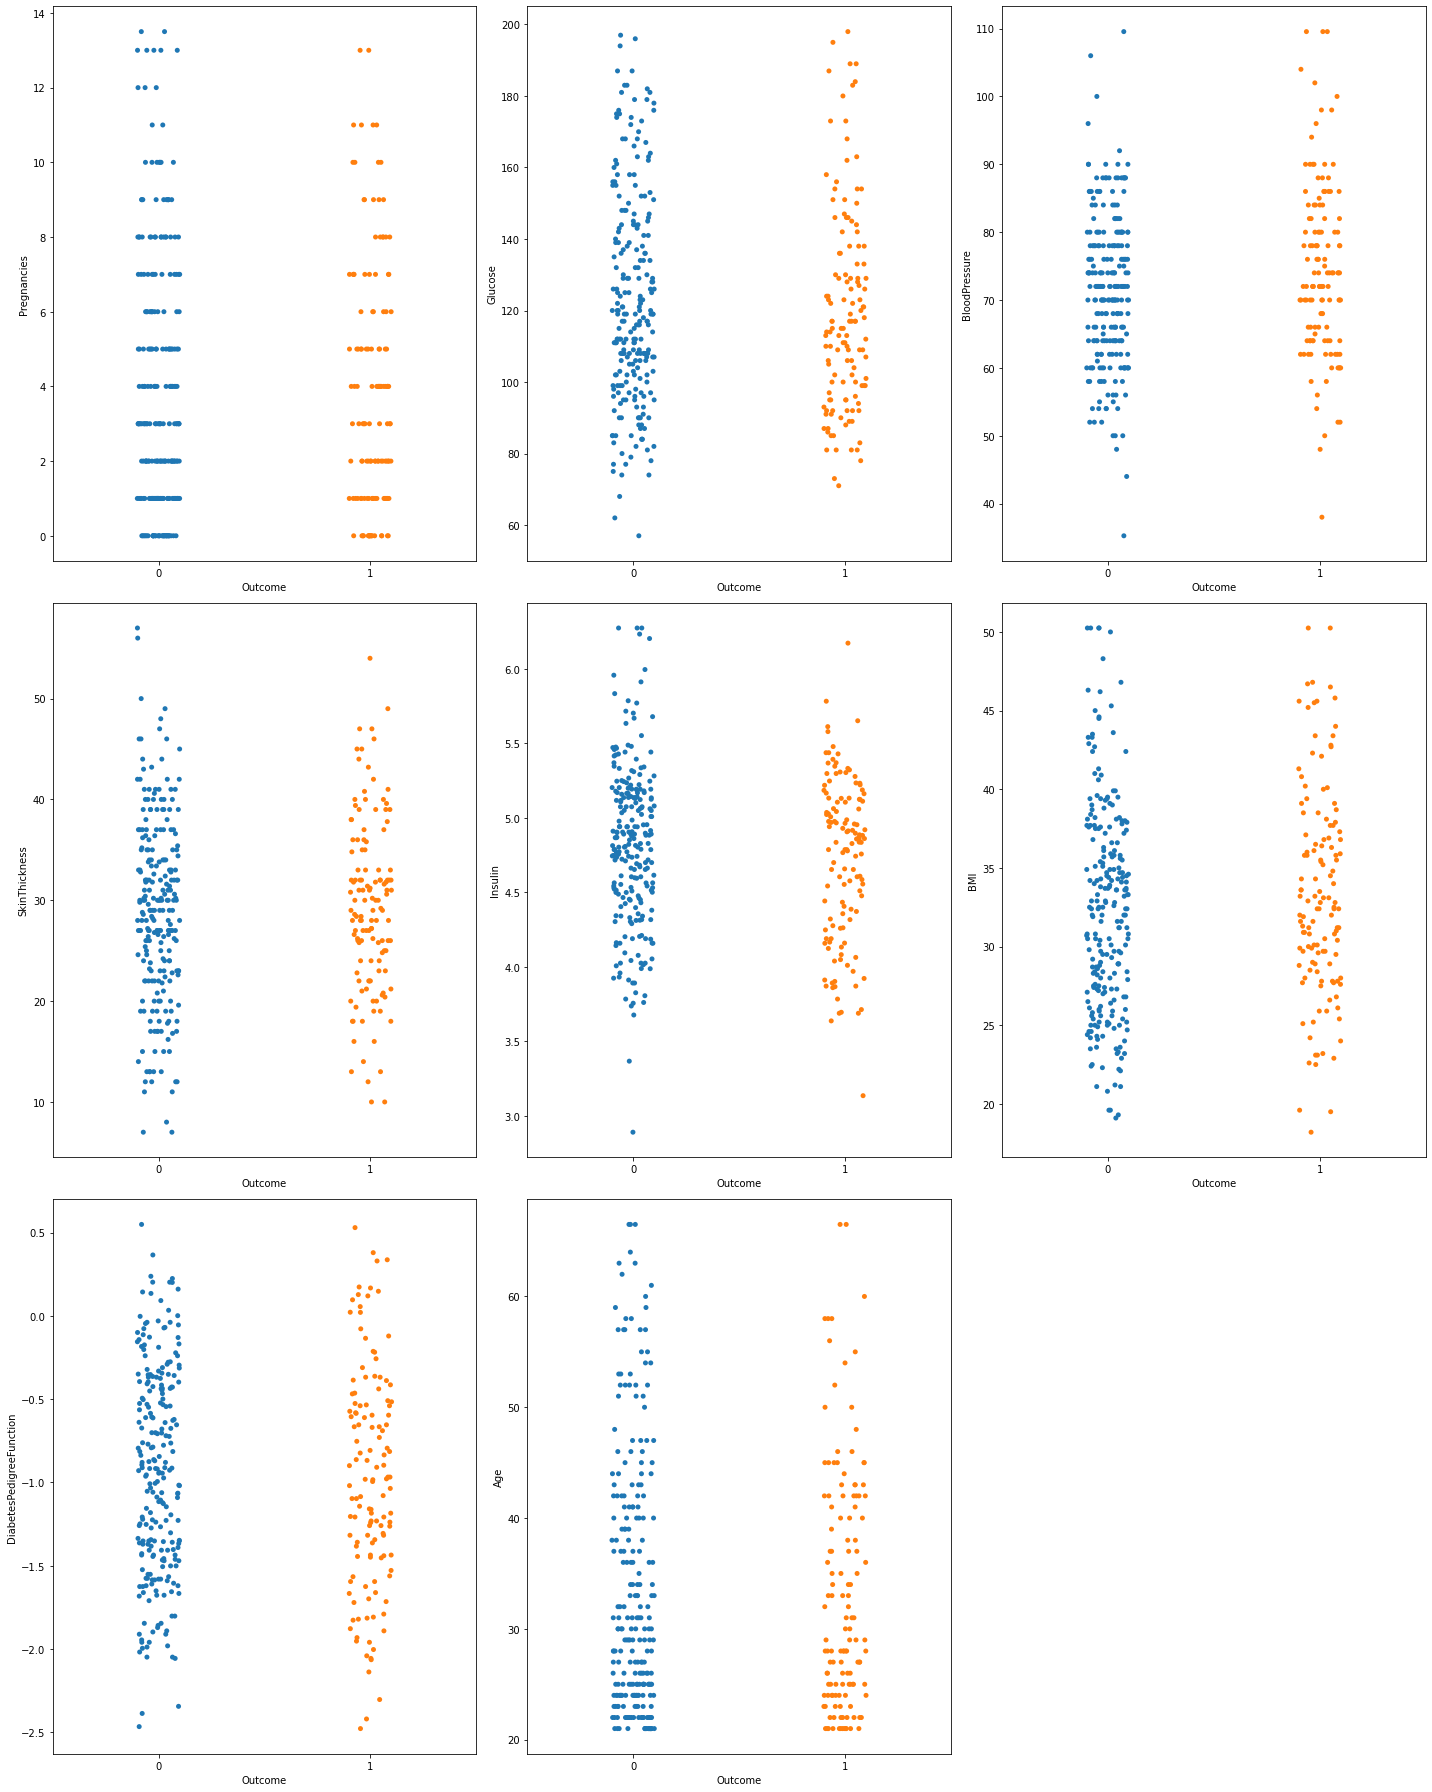

In [155]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_x_train.columns:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y_train,new_x_train[column])
    plotnumber+=1
plt.tight_layout()

### standardize the datasets

In [156]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(new_x_train)
s_x_test=scaler.transform(new_x_test)

#### model building

In [157]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(s_x_train,y_train)

LogisticRegression()

In [158]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [159]:
y_pred = log_reg.predict(s_x_test)

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

#### Accuracy

In [161]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7402597402597403

#### Confusion Matrix

In [162]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[127,  23],
       [ 37,  44]], dtype=int64)

In [163]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [164]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)


0.7402597402597403

#### Precison

In [165]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8466666666666667

#### Recall

In [166]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.774390243902439

#### F1 Score

In [167]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8089171974522292